<a href="https://colab.research.google.com/github/Nishant-codex/single_cell_analysis/blob/main/notebooks/model_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Brian2==2.4.2

In [ ]:
!pip install brian2modelfitting

import brian2modelfitting


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#@title
import os
import pickle
from typing import Set
# from jedi import settings
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt
from numpy.lib.function_base import append 
import scipy.io as spio
from scipy.io import loadmat, savemat
import importlib.util
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from scipy.sparse import data 

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
import pandas as pd 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
#@title functions
def loadmat_(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
#     try:
    if ('analyzed' in filename )and ('_CC_' not in filename):
        Data = []
        data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)['Data']
        try:
            for i in range(len(data)):
                data_ = data[i]
                data_ = _todict(data_) 
                Data.append(_check_keys(data_))
            return Data
        except:
            data_ = data
            data_ = _todict(data_) 
            Data.append(_check_keys(data_))
            return Data
    elif ('analyzed' in filename) and ('_CC_' in filename):
        data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)
        data = _todict(data)          
    else:
        data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)['Data']
        data = _todict(data) 
    return _check_keys(data)

#     except:
#         print('here')
#         pass
def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], spio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs nested dictionaries from matobjects
    '''
    dict = {}
    try:
      for strg in matobj._fieldnames:
          elem = matobj.__dict__[strg]
          if isinstance(elem, spio.matlab.mio5_params.mat_struct):
              dict[strg] = _todict(elem)
          elif strg =='Analysis':
              temp = []
              for i in elem:

                  temp.append(_todict(i))
              dict['Analysis'] = temp
          else:
              
              dict[strg] = elem
    except:
        for strg in matobj.keys():
          elem = matobj[strg]
          if isinstance(elem, spio.matlab.mio5_params.mat_struct):
              dict[strg] = _todict(elem)
          elif strg =='Analysis':
              temp = []
              for i in elem:

                  temp.append(_todict(i))
              dict['Analysis'] = temp
          else:
              
              dict[strg] = elem
    return dict

In [ ]:
path = '/content/gdrive/MyDrive/drive-download-20210929T052205Z-001/CC - Inhibitory/Raw CC/'
path2 = '/content/gdrive/MyDrive/drive-download-20210929T052205Z-001/CC - Inhibitory/Analyzed/'

data = loadmat_(path2+'analyzed_CC_xuan_7-6-19-E4-CCSTEP-NODRUG.mat')
onset = data['out']['exp']['current']['onset']['ind']
offset = data['out']['exp']['current']['offset']['ind']
tracename=data['out']['data']['tracename']
values=data['out']['data']['values']
index = data['out']['exp']['AP']['latency']['all']
v = []
I = []
save_ind_v = []

save_ind_I = []

for j in range(2,20):
  onset_ = onset[0]
  offset_ = offset[0]
  index_ = index[19]
  name_split = tracename[j].split('_')
  if name_split[-1]== '2' and name_split[-3]== '1':
    save_ind_v.append(j)
    v.append(values[j][onset_:offset_,1])#[index]
  elif name_split[-1]== '1' and name_split[-3]== '1':
    save_ind_I.append(j)
    I.append(values[j][onset_:offset_,1])#[index]
v.append(values[1][onset_:offset_,1])#[index]
I.append(values[0][onset_:offset_,1])#[index]


In [ ]:
#@title
path = '/content/gdrive/MyDrive/drive-download-20210929T052205Z-001/CC - Inhibitory/Raw CC/'
path2 = '/content/gdrive/MyDrive/drive-download-20210929T052205Z-001/CC - Inhibitory/Analyzed/'

data = loadmat_(path2+'analyzed_CC_xuan_7-6-19-E4-CCSTEP-NODRUG.mat')
onset = data['out']['exp']['current']['onset']['ind']
offset = data['out']['exp']['current']['offset']['ind']
tracename=data['out']['data']['tracename']
values=data['out']['data']['values']
index = data['out']['exp']['AP']['latency']['all']
v = []
I = []
save_ind_v = []

save_ind_I = []

for j in range(2,20):
  onset_ = onset[0]
  offset_ = offset[0]
  index_ = index[19]
  name_split = tracename[j].split('_')
  if name_split[-1]== '2' and name_split[-3]== '1':
    save_ind_v.append(j)
    v.append(values[j][onset_:offset_,1])#[index]
  elif name_split[-1]== '1' and name_split[-3]== '1':
    save_ind_I.append(j)
    I.append(values[j][onset_:offset_,1])#[index]
v.append(values[1][onset_:offset_,1])#[index]
I.append(values[0][onset_:offset_,1])#[index]


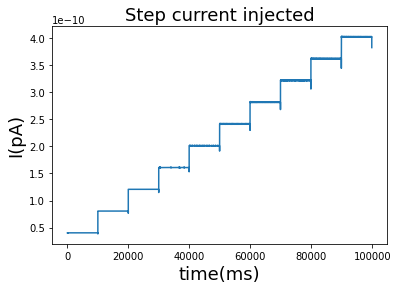

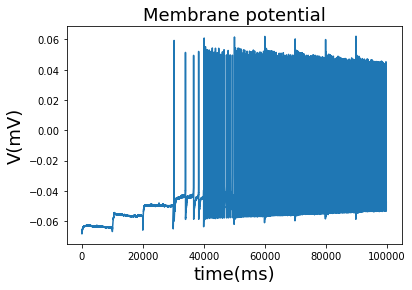

In [ ]:
a = I[0]
b = v[0]
for i in range(len(I)-1):
  b = np.concatenate((b,v[i+1]))
  a = np.concatenate((a,I[i+1]))
plt.plot(a)
plt.xlabel('time(ms)',fontsize=18)
plt.ylabel('I(pA)',fontsize=18)
plt.title('Step current injected',fontsize=18)
plt.show()
plt.plot(b)
plt.xlabel('time(ms)',fontsize=18)
plt.ylabel('V(mV)',fontsize=18)
plt.title('Membrane potential',fontsize=18)

plt.show()

In [ ]:
dat = loadmat_('/content/gdrive/MyDrive/Analyzed/Copy of NC_170627_DopD2D1_E1_analyzed.mat')

KeyError: ignored

In [ ]:
def get_keys(dictionary):
    result = []
    for key, value in dictionary.items():
        if type(value) is dict:
            new_keys = get_keys(value)
            result.append(key)
            for innerkey in new_keys:
                result.append(f'{key}/{innerkey}')
        else:
            result.append(key)
    return result
get_keys(dat[0])    

['hidden_state',
 'input_current',
 'input_generation_settings',
 'input_generation_settings/baseline',
 'input_generation_settings/amplitude_scaling',
 'input_generation_settings/tau',
 'input_generation_settings/mean_firing_rate',
 'input_generation_settings/sampling_rate',
 'input_generation_settings/duration',
 'input_generation_settings/FLAG_convert_to_amphere',
 'input_generation_settings/condition',
 'input_generation_settings/experimentname',
 'input_generation_settings/experimentername',
 'input_generation_settings/experimentnr',
 'input_generation_settings/trialnr',
 'membrane_potential',
 'spikeindices',
 'thresholds',
 'thresholdindices',
 'classification',
 'classification/apwidth',
 'classification/ahpamp',
 'classification/meanspike',
 'classification/meanspike/v',
 'classification/meanspike/spikeindex',
 'classification/meanspike/threshold',
 'classification/meanspike/thresholdindex',
 'classification/meanspike/apwidth',
 'classification/meanspike/ahpamp',
 'firing_rate

In [ ]:

#@title
def join_cond(lis_cond = None):
  path = '/content/gdrive/MyDrive/lists/all_files_new.csv'
  a = pd.read_csv(path)
  cond= np.sort(np.unique(a['condition']))
  temp = []
  if len(lis_cond)>1:
    for i in lis_cond:
      
      temp.append(a.groupby('condition').get_group(i))
    new_df = temp[0]
    for j in range(1,len(temp)):
      new_df = pd.concat([new_df,temp[j]])
  else:
    new_df = a.groupby('condition').get_group(lis_cond[0])
  return new_df



path = '/content/gdrive/MyDrive/lists/all_files_new.csv'
a = pd.read_csv(path)
# cond= np.sort(np.unique(a['condition']))
path_i = '/content/gdrive/MyDrive/Analyzed/'
cond_i = ['aCSF']
new_a = join_cond(cond_i)
# new_a = new_a.groupby('condition').get_group(cond_i)
new_a_inh = new_a.groupby('tau').get_group(50)
new_a_exc = new_a.groupby('tau').get_group(250)
exp_name_inh = np.array(new_a_inh['experimentname'])
trials_inh = np.array(new_a_inh['trialnr'])
exp_name_exc = np.array(new_a_exc['experimentname'])
trials_exc = np.array(new_a_exc['trialnr'])


NameError: ignored

In [ ]:
try:
  data  = loadmat_(path_i+exp_name_exc[1]+'_analyzed.mat')
except:
  data  = loadmat_(path_i+'Copy of '+exp_name_exc[1]+'_analyzed.mat')
I_FN = data[0]['input_current']
V_FN = data[0]['membrane_potential']


Text(0, 0.5, 'V(mV)')

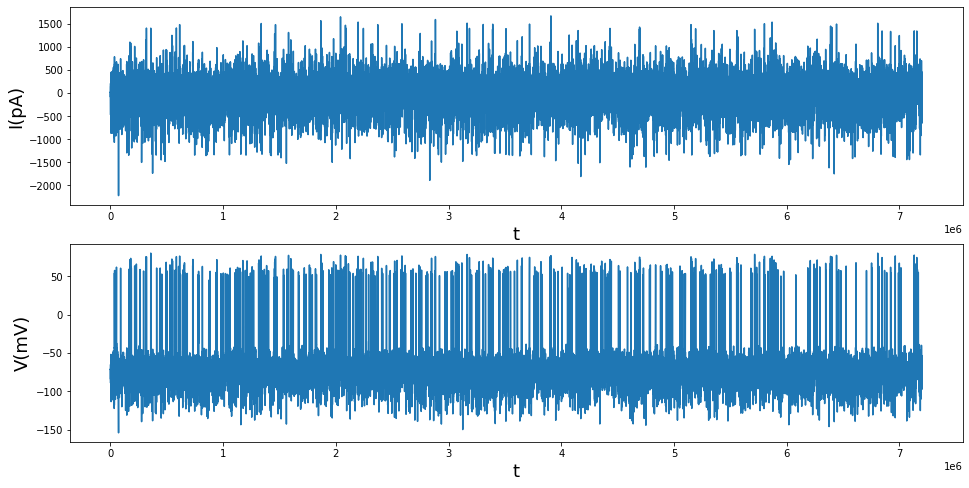

In [ ]:
fig,ax = plt.subplots(2,1,figsize=[16,8])
ax[0].plot(I_FN)
ax[0].set_xlabel('t',fontsize=18)
ax[0].set_ylabel('I(pA)',fontsize=18)

ax[1].plot(V_FN)
ax[1].set_xlabel('t',fontsize=18)
ax[1].set_ylabel('V(mV)',fontsize=18)


In [ ]:
#ZAP current 0
import math 
Iapp = 200
fmin = 5
fmax  =100
tmax = 10000
L = math.log(fmax/fmin)/tmax
ZAP = lambda t:Iapp*math.sin(2*math.pi*ft(t)*t)

ft = lambda t: (0.001)*fmin*(np.exp(L*t)-1)/(L*t)
zap_all = []
for i in range(tmax):
  if i == 0:
    zap_all.append(0)
  else:  
    zap_all.append(ZAP(i))


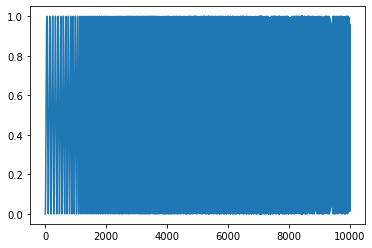

In [ ]:
plt.plot((np.array(zap_all)**2)/40000)

# Type 2

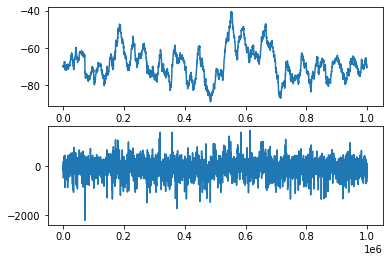

In [ ]:
#@title
#3d Model
from scipy.stats import zscore
from copy import copy

global V
global y
global z
ctype = 2
c = 2
V_init = -70
y_init = 0.000025
z_init = 0
#z
beta_z= -21
gamma_z= 15
phi_z=0.15

gk=20 
VK=-100 
#y
phi_y=0.15
beta_y=-10 
gamma_y=10

beta_m = -1.2 
gamma_m = 18
gna = 20 
Vna = 50
gl=2 
Vl=-70
if ctype==2:
  gsub= 2 
  Vsub= -100
else:
  gsub= 3 
  Vsub= 50

dt = (1/20001)

yinf = lambda: .5*(1+np.tanh((V-beta_y)/gamma_y))
tauy = lambda: 1/np.cosh((V-beta_y)/(2*gamma_y))
minf = lambda: .5*(1+np.tanh((V-beta_m)/gamma_m))
zinf = lambda: .5*(1+np.tanh((V-beta_z)/gamma_z))
tauz = lambda: 1/np.cosh((V-beta_z)/(2*gamma_z))

dV = lambda I :(I-gna*minf()*(V-Vna)-gk*y*(V-VK)-gl*(V-Vl)-gsub*z*(V-Vsub))/c
dy = lambda: phi_y*(yinf()-y)/tauy()
dz = lambda: phi_z*(zinf()-z)/tauz()

def run_model(current):
    global V
    global y
    global z

    #Reset variables
    V = copy(V_init)
    y = copy(y_init)
    z = copy(z_init)
    
    data = {
        "t" : [],
        "I" : [],
        "V" : [],
        "y" : [],
        "z" : [],
        "yinf" : [],
        "tauy" : [],
        "minf" : [],
        "zinf" : [],
        "tauz" : []
    }

    for t, I in zip(range(len(current)), current):
        #Update variables
        V = V + dV(I)*dt
        y = y + dy()*dt
        z = z + dy()*dt

        #Update DataFrame
        data["t"].append(t)
        data["I"].append(I)
        data["V"].append(V)
        data["y"].append(y)
        data["z"].append(z)
        data["yinf"].append(yinf())
        data["tauy"].append(tauy())
        data["minf"].append(minf())
        data["zinf"].append(zinf())
        data["tauz"].append(tauz())

    return pd.DataFrame.from_dict(data)
def plot_model(data):
    for  col in data.keys():
        if col in ["t", "I", "L"]: continue
        plt.plot(data[col]/np.mean(data[col]))
    plt.legend(loc="upper right")
    plt.show()

current_tp2 = a*1e12 # np.array(zap_all)+100#  dat['input_current'][:50000]
# data_tp2 = run_model(current_tp2)

# current_zap_tp2 = np.array(zap_all)+200
# data_zap_tp2 = run_model(current_zap_tp2)
data_FN_tp2 = run_model(I_FN[:1000000])

# fig,ax = plt.subplots(2,1)
# ax[0].plot(data_tp2['V'])
# ax[1].plot(data_tp2['I']) 
# plt.show()

# fig,ax = plt.subplots(2,1)
# ax[0].plot(data_zap_tp2['V'])
# ax[1].plot(data_zap_tp2['I']) 
# plt.show()


fig,ax = plt.subplots(2,1)
ax[0].plot(data_FN_tp2['V'])
ax[1].plot(data_FN_tp2['I']) 
plt.show()

In [ ]:
avg_I = []
avg_V = []
int_v = []
int_v = []

size = np.size(data_tp2['I'])//10
for i in range(10):
  avg_I.append(np.array(data_tp2['I'][size*i:size*(i+1)]))
for i in range(10):
  avg_V.append(np.array(data_tp2['V'][size*i:size*(i+1)]))
for m in avg_I

# Type 1

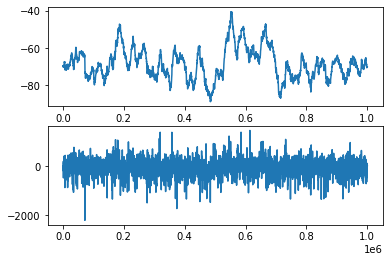

In [ ]:
#@title
#3d Model
from scipy.stats import zscore
from copy import copy

global V
global y
global z
ctype = 1
c = 2
V_init = -70
y_init = 0.000025
z_init = 0
#z
beta_z= -21
gamma_z= 15
phi_z=0.15

gk=20 
VK=-100 
#y
phi_y=0.15
beta_y=-10 
gamma_y=10

beta_m = -1.2 
gamma_m = 18
gna = 20 
Vna = 50
gl=2 
Vl=-70
if ctype==2:
  gsub= 2 
  Vsub= -100
else:
  gsub= 3 
  Vsub= 50

dt = (1/20001)

yinf = lambda: .5*(1+np.tanh((V-beta_y)/gamma_y))
tauy = lambda: 1/np.cosh((V-beta_y)/(2*gamma_y))
minf = lambda: .5*(1+np.tanh((V-beta_m)/gamma_m))
zinf = lambda: .5*(1+np.tanh((V-beta_z)/gamma_z))
tauz = lambda: 1/np.cosh((V-beta_z)/(2*gamma_z))

dV = lambda I :(I-gna*minf()*(V-Vna)-gk*y*(V-VK)-gl*(V-Vl)-gsub*z*(V-Vsub))/c
dy = lambda: phi_y*(yinf()-y)/tauy()
dz = lambda: phi_z*(zinf()-z)/tauz()

def run_model(current):
    global V
    global y
    global z

    #Reset variables
    V = copy(V_init)
    y = copy(y_init)
    z = copy(z_init)
    
    data = {
        "t" : [],
        "I" : [],
        "V" : [],
        "y" : [],
        "z" : [],
        "yinf" : [],
        "tauy" : [],
        "minf" : [],
        "zinf" : [],
        "tauz" : []
    }

    for t, I in zip(range(len(current)), current):
        #Update variables
        V = V + dV(I)*dt
        y = y + dy()*dt
        z = z + dy()*dt

        #Update DataFrame
        data["t"].append(t)
        data["I"].append(I)
        data["V"].append(V)
        data["y"].append(y)
        data["z"].append(z)
        data["yinf"].append(yinf())
        data["tauy"].append(tauy())
        data["minf"].append(minf())
        data["zinf"].append(zinf())
        data["tauz"].append(tauz())

    return pd.DataFrame.from_dict(data)
def plot_model(data):
    for  col in data.keys():
        if col in ["t", "I", "L"]: continue
        plt.plot(data[col]/np.mean(data[col]))
    plt.legend(loc="upper right")
    plt.show()

current_tp1 = a*1e12 #np.array(zap_all)+100#
data_tp1 = run_model(current_tp1)


# current_zap_tp1 = np.array(zap_all)+200
# data_zap_tp1 = run_model(current_zap_tp1)
data_FN_tp1 = run_model(I_FN[:1000000])
# fig,ax = plt.subplots(2,1)
# ax[0].plot(data_tp1['V'])
# ax[1].plot(data_tp1['I']) 
# plt.show()

# fig,ax = plt.subplots(2,1)
# ax[0].plot(data_zap_tp1['V'])
# ax[1].plot(data_zap_tp1['I']) 


fig,ax = plt.subplots(2,1)
ax[0].plot(data_FN_tp1['V'])
ax[1].plot(data_FN_tp1['I']) 
plt.show()

In [ ]:
len(data_FN_tp1['V'])

1000000

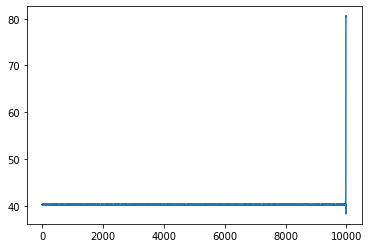

In [ ]:
plt.plot(data_tp1['I'][:10000])

# Impedence

In [ ]:
#@title
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
import numpy.matlib 

def makespectrumt(trace, timelen,adcrate):
    # time is the timelength of the sub evaluation 1/time is the freq resolution!
    NFFT  = timelen * adcrate
    
    NFFT2 = int(np.floor(NFFT/2))
    NFFT  = int(2 * NFFT2)
    fas   = np.arange(0,NFFT2-1,(1/timelen)) #(0:(1/timelen):(NFFT2-1)/timelen)'  
    fwdw  = signal.windows.hamming(NFFT)
    start = 0
    last  = len(trace)-NFFT
    count = 0
    pwr = 0
    while start<last:
        endpoint = start + NFFT 
        spoor = trace[start:endpoint]-np.mean(trace[start:endpoint])
        spect = fft(fwdw*spoor,NFFT)/NFFT
        if count == 0: 
          pwr = 2*np.abs(spect[1:NFFT2]) 
        else: 
          pwr = pwr + 2*np.abs(spect[1:NFFT2])
        start = start + NFFT2
        count += 1 
    pwr = pwr/count
    return pwr, fas


def overdracht_wytse(par1, spoordac, spooradc, dacrate, adcrate, par2=None):

    time = par1;
    if par2 is None: 
      nf = 0 
    else: 
      nf = par2
    [pwrdac, fasdac] = makespectrumt(spoordac,time,dacrate)
    [pwradc, fasadc] = makespectrumt(spooradc,time,adcrate)
    lendac = len(pwrdac)
    lenadc = len(pwradc)
    if lendac>lenadc: 
        pwrdac = pwrdac[1:lenadc]
        fas = fasdac[1:lenadc]
    elif lenadc>lendac: 
      pwradc = pwradc[1:lendac]
      fas = fasadc[1:lendac]
    else:
        fas = fasdac
    
    if nf>1:
        pwrdac = signal.filtfilt(np.matlib.repmat(1/nf,nf,1),1,pwrdac)
        pwradc = signal.filtfilt(np.matlib.repmat(1/nf,nf,1),1,pwradc)
    ovr = pwradc/pwrdac
    
    y=ovr  
    return y 


def spectrum_wytse(spoor,rate, par1, par2=None):
    time = par1
    if par2==None: nf = 0
    else: nf = par2
    
    [pwr,fas] = makespectrumt(spoor,time,rate)
    
    if nf>1: pwr = scipy.signal.filtfilt(np.matlib.repmat(1/nf,nf,1),1,pwr)
    x=pwr
    y=fas
    return (x,y)

def  return_stiched_spike_train(data,subthreshold =False,plot=False):

    V= data['membrane_potential']
    I= data['input_current']
    spikes = data['spikeindices']
    if data['input_generation_settings']['tau'] == 250:
        left = 20
        right = 30 
    else:
        left = 20
        right = 20 
    empty_cell = []
    for i in spikes:
        empty_cell.append([np.arange(i-left,i+right)])
        V1 = V[i-left]
        V2 = V[i+right]
        if V1!=V2:
            div = (V2-V1)/(left+right)
            V[i-left:i+right] = np.arange(V1,V2,div)[:left+right] 
        else:
            V[i-left:i+right] = np.ones((1,left+right))*V1        
        
        I1 = I[i-left]
        I2 = I[i+right]       
        if I1!=I2:
            divI = (I2-I1)/(left+right)       

            I[i-left:i+right] = np.arange(I1,I2,divI)[:left+right]    
        else:
            
            I[i-left:i+right] = np.ones((1,left+right))*I1

    V_ = V  
    I_ = I   
    tailored_spikes = np.ndarray.flatten(np.array(empty_cell))    #{cat(2, empty_cell{:})} 
    zero_spikes = np.zeros(np.size(V))
    zero_spikes[tailored_spikes] = True

    if subthreshold == True:
        zero_spikes = ~zero_spikes

    return zero_spikes,V_,I_

In [ ]:
fs1 = 2000;                                                               #% sample frequency (Hz)
t = np.arange(0,20000/fs1,1/fs1)                                          #% 10 second span time vector
x1 = (200)*np.sin(2*np.pi*40*(t-2))+(200)*np.sin(2*np.pi*20*(t-2))        #% 40 Hz component
fs2 = 2000;                                                               #% sample frequency (Hz)
t = np.arange(0,20000/fs2,1/fs2)                                          #% 10 second span time vector
x2 = (200)*np.sin(2*np.pi*20*(t-2))                                       #% 40 Hz component

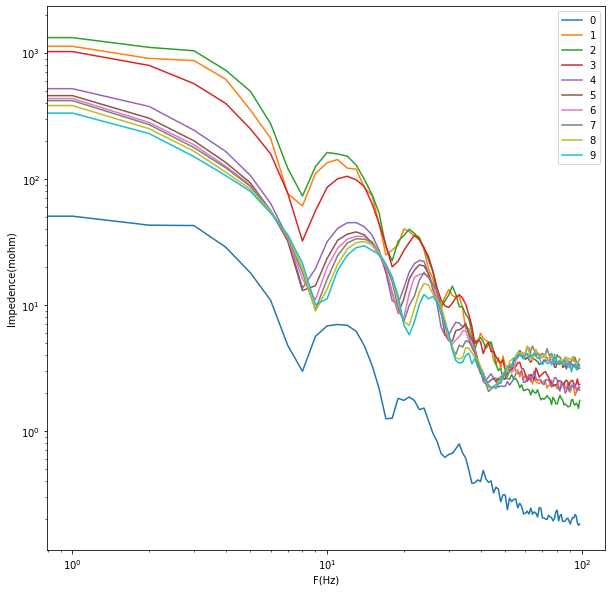

In [ ]:
#@title
size_v = np.array(data_tp2['I']).size
size_v = size_v//10
# plt.plot(np.array(data['V'])[1*size_v:2*size_v])
imp_tp2 = []

for i in range(10):
  try:
    Imp = overdracht_wytse(0.01,np.array(data_tp2['I'])[i*size_v:(i+1)*size_v-10],np.array(data_tp2['V'])[i*size_v:(i+1)*size_v-10],20001,20001,1)
    imp_tp2.append(Imp)
  except:
    pass 

fig,ax = plt.subplots(1,1,figsize=[10,10])
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(np.array(imp_tp2).T)
ax.legend(np.arange(10))
ax.set_xlabel('F(Hz)')
ax.set_ylabel('Impedence(mohm)')
plt.show()     
# Imp = overdracht_wytse(1, , x2, 2000, 2000, 1)

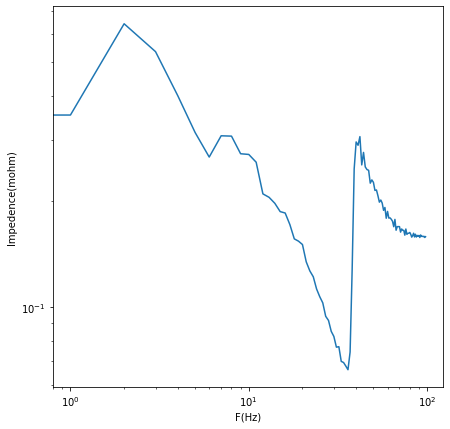

In [ ]:
Imp_zap2 = overdracht_wytse(0.01, np.array(data_zap_tp2['I']),np.array(data_zap_tp2['V']), 20000, 20000, 1)
fig,ax = plt.subplots(1,1,figsize=[7,7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(np.array(Imp_zap2).T)
ax.set_xlabel('F(Hz)')
ax.set_ylabel('Impedence(mohm)')
plt.show()

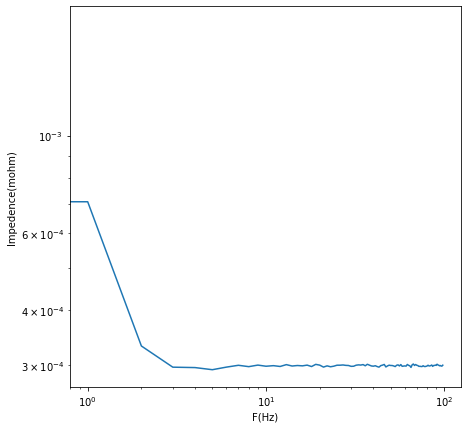

In [ ]:
ImpFN2 = overdracht_wytse(0.01, np.array(data_FN_tp2['I']),np.array(data_FN_tp2['V']), 20000, 20000, 1)
fig,ax = plt.subplots(1,1,figsize=[7,7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(np.array(ImpFN2).T)
ax.set_xlabel('F(Hz)')
ax.set_ylabel('Impedence(mohm)')
plt.show()

9980


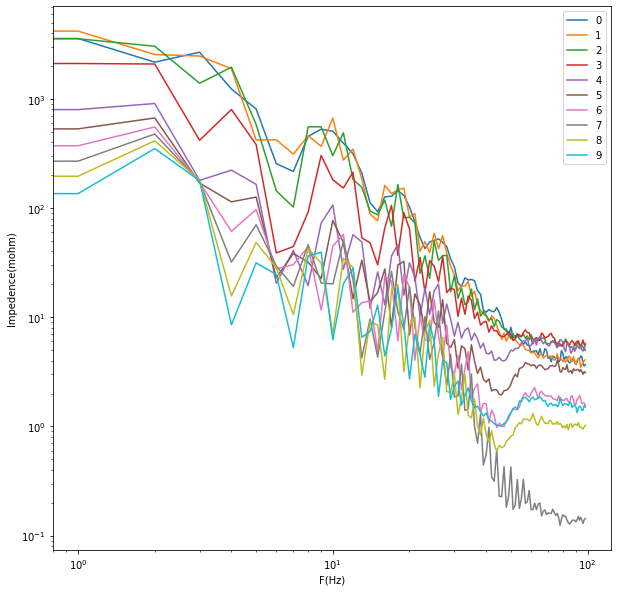

In [ ]:
size_v = np.array(data_tp1['I']).size
size_v = size_v//10
print(size_v)
# plt.plot(np.array(data['V'])[1*size_v:2*size_v])
imp_tp1 = []

for i in range(10):
  try:
    Imp = overdracht_wytse(0.01,np.array(data_tp1['I'])[i*size_v:(i+1)*size_v-10],np.array(data_tp1['V'])[i*size_v:(i+1)*size_v-10],20001,20001,1)
    imp_tp1.append(Imp)
  except:
    pass 

fig,ax = plt.subplots(1,1,figsize=[10,10])
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(np.array(imp_tp1).T)
ax.legend(np.arange(10))
ax.set_xlabel('F(Hz)')
ax.set_ylabel('Impedence(mohm)')
plt.show()     
# Imp = overdracht_wytse(1, , x2, 2000, 2000, 1)

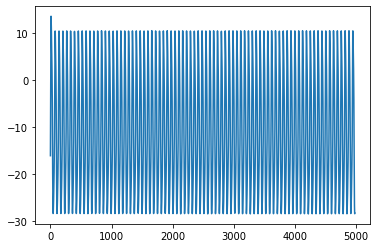

In [ ]:
plt.plot(np.array(data_tp1['V'])[9*size_v:10*size_v-5000])

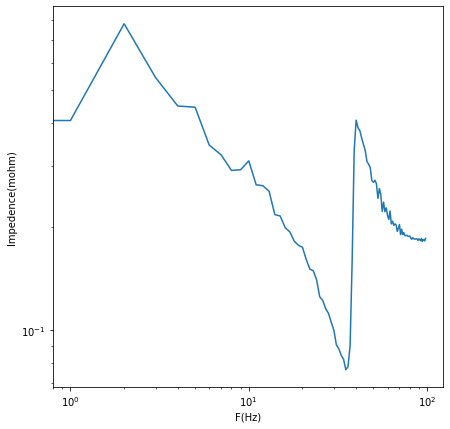

In [ ]:
Imp_zap1 = overdracht_wytse(0.01, np.array(data_zap_tp1['I']),np.array(data_zap_tp1['V']), 20001, 20001, 1)
fig,ax = plt.subplots(1,1,figsize=[7,7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(np.array(Imp_zap1).T)
ax.set_xlabel('F(Hz)')
ax.set_ylabel('Impedence(mohm)')
plt.show()

(10000,)


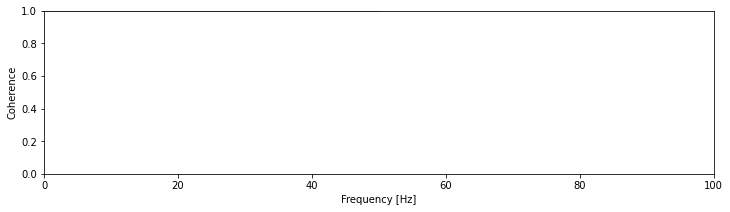

In [ ]:
import scipy.io as sio
from pylab import *
rcParams['figure.figsize']=(12,3)                   # Change the default figure size
#ZAP current 0
import math 
def return_zap(Iapp,fmin,fmax,tmax):
  Iapp = Iapp
  fmin = fmin
  fmax = fmax 
  tmax = tmax
  L = math.log(fmax/fmin)/tmax
  ZAP = lambda t:Iapp*math.sin(2*math.pi*ft(t)*t)

  ft = lambda t: (0.001)*fmin*(np.exp(L*t)-1)/(L*t)
  zap_all = []
  for i in range(tmax):
    if i == 0:
      zap_all.append(0)
    else:  
      zap_all.append(ZAP(i))
  return np.array(zap_all)

# Load the data and plot it.
data = return_zap(200,50,100,10000) #sio.loadmat('matfiles/spikes-LFP-1.mat')     # Load the multiscale data,
y = data                                       # ... get the LFP data,
n = return_zap(200,1,49,10000)                                       # ... get the spike data,
# t = data['t'].reshape(-1)                           # ... get the time axis,
# K = shape(n)[0]                                     # Get the number of trials,
N = data.shape  
print(N)                                   # ... and the number of data points in each trial,
dt = 0.01                                     # Get the sampling interval.

SYY = np.zeros(int((N[0]/2)+1))                             # Variable to store field spectrum.
SNN = np.zeros(int((N[0]/2)+1))                             # Variable to store spike spectrum.
SYN = np.zeros(int((N[0]/2)+1), dtype=complex)              # Variable to store cross spectrum.

# for k in arange(K):                                 # For each trial,
yf = rfft((y-mean(y)) *hanning(N[0]))    # Hanning taper the field,
nf = rfft((n-mean(n)))                # ... but do not taper the spikes.
SYY = SYY + ( real( yf*conj(yf) ) )        # Field spectrum
SNN = SNN + ( real( nf*conj(nf) ) )           # Spike spectrum
SYN = SYN + (          yf*conj(nf))           # Cross spectrum

cohr = abs(SYN) / sqrt(SYY) / sqrt(SNN)             # Spike-field coherence
f = rfftfreq(N[0], dt)                                 # Frequency axis for plotting

plot(f,cohr)                                        # Plot the result.
xlim([0, 100])
ylim([0, 1])
xlabel('Frequency [Hz]')
ylabel('Coherence');

In [ ]:
cohr

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
path = '/content/gdrive/MyDrive/Step-and-Hold Protocol1'
all_sh= os.listdir(path)

data_1  = loadmat(path+'/'+all_sh[0])
# a1

In [ ]:
V_temp = []
for i in a:
  V_ = []
  V_all = []
  data_1  = loadmat(path+'/'+all_sh[0])
  for i in data_1.keys():
    if 'Trace' in i and i[-1]=='2' :
        V_.append(np.array(data_1[i][onset[0]:offset[0],1]))
  for m in V_:
    V_all = np.concatenate((V_all,m))


KeyboardInterrupt: ignored

In [ ]:
!pip install quickspikes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 544 kB 8.8 MB/s 


In [ ]:
#@title
import plotly.graph_objects as go
import pandas as pd
from scipy.signal import find_peaks
import quickspikes as qs

def return_impedence(data):
  data_1 = data
  V = []
  I = []
  I_ = []
  V_ = []
  for i in data_1.keys():
    if 'Trace' in i and i[-1]=='1' :
        I.append(np.array(data_1[i][onset[0]:offset[0],1]))

  # for i in I:
  #   I_ = np.concatenate((I_,i))

  for v in data_1.keys():
    if 'Trace' in v and v[-1]=='2' :
        V.append(np.array(data_1[v][onset[0]:offset[0],1]))

  # for v in V:
  #   V_ = np.concatenate((V_,v))

  imp = overdracht_wytse(0.02, I[9], V[9], 20001, 20001, 1)
  return imp, V, I 

def half_width(data, plot=False):
  data_1 = data
  V = []
  I = []
  I_ = []
  V_ = []

  for i in data_1.keys():
    if 'Trace' in i and i[-1]=='1' :
        I.append(np.array(data_1[i][onset[0]:offset[0],1]))

  for v in data_1.keys():
    if 'Trace' in v and v[-1]=='2' :
        V.append(np.array(data_1[v][onset[0]:offset[0],1]))
  for v in V:
    V_ = np.concatenate((V_,v))
  plt.show()
  spikes = []
  size = len(V_)
  size_i = size//10

  reldet = qs.detector(2.5, 30)
  samples = np.array(V_)
  reldet.scale_thresh(samples.mean(), samples.std())
  all_peaks = reldet.send(samples)
  all_peaks = np.array(all_peaks)
  if plot:
    plt.plot( V_)
    plt.scatter(all_peaks,V_[all_peaks],c='r')
  plt.show()
  for i in range(10):
    temp = all_peaks[all_peaks>i*9980]
    temp = temp[temp<(i+1)*9980]
    spikes.append(list(temp))
  spikes = np.array(spikes)
  def find_half_width(ind, V):
    half = V[ind-200:ind]
    ind_half = np.where(half<-0.01)[0]
    try:
      width= len(half[ind_half[-1]:ind])
    except:
     ind_half = np.where(half<-0.001)[0]
     width= len(half[ind_half[-1]:ind])
    return width

  widths = []
  spikes_all = []
  for i in spikes:
    spikes_all = np.concatenate((spikes_all,i))
  for i in spikes[9]:
    
    widths.append(find_half_width(int(i),V_))
  return np.mean(np.diff(spikes[9])), widths


In [ ]:
imp = []
exc = []
inh = []
widths_exc = []
widths_inh = []
prob = []
for i in all_sh:
  if 'NODRUG' in i:
    data_1  = loadmat(path+'/'+i)
    try:
      isi,widths = half_width(data_1)
      if isi>500:
        inh.append(i)
        widths_inh.append(widths)
      elif isi<500:
        exc.append(i)
        widths_exc.append(widths)

      else: 
        prob.append(i)
    except:
      print(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


xuan_26-3-19-E2-CCSTEP-NODRUG.mat
xuan_27-5-20-E3-CCSTEP-NODRUG.mat


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars


xuan_14-6-20-E3-CCSTEP-NODRUG.mat
xuan_20-9-19-E3-CCSTEP-NODRUG.mat


In [ ]:
imp_exc = []
for i in exc:
  dat = loadmat(path+'/'+i)
  imp_,v,i =return_impedence(dat)
  imp_exc.append(imp_)
imp_inh = []
for i in inh:
  dat = loadmat(path+'/'+i)
  imp_,v,i =return_impedence(dat)
  imp_inh.append(imp_)  

Text(0, 0.5, 'mOhm')

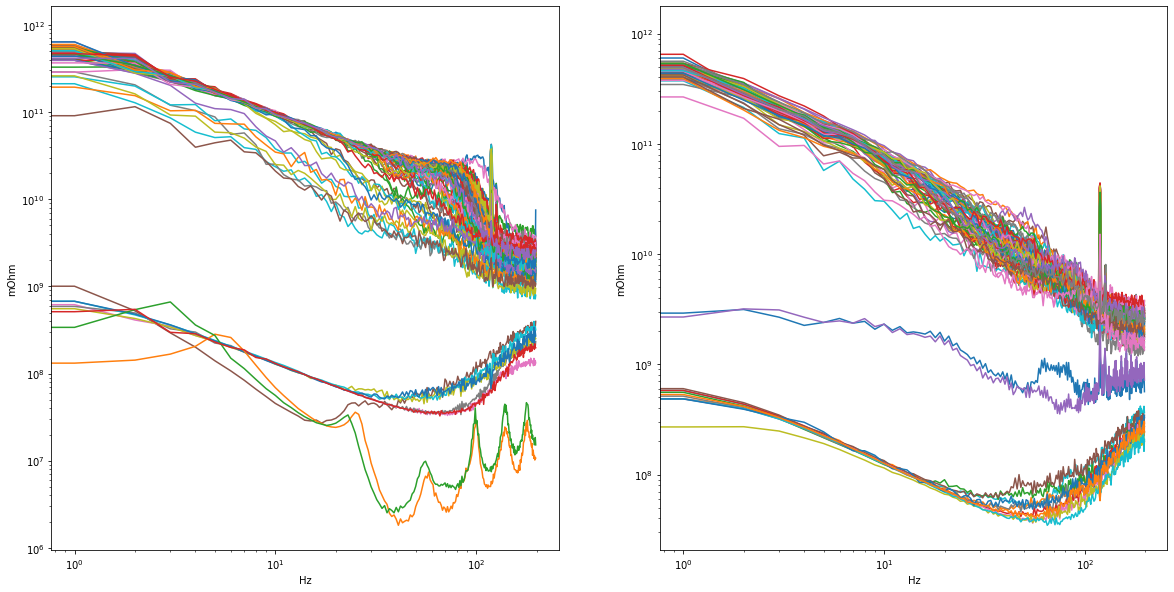

In [ ]:
fig,ax = plt.subplots(1,2,figsize = [20,10])
ax[0].plot(np.array(imp_exc).T)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('Hz')
ax[0].set_ylabel('mOhm')
ax[1].plot(np.array(imp_inh).T)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Hz')
ax[1].set_ylabel('mOhm')


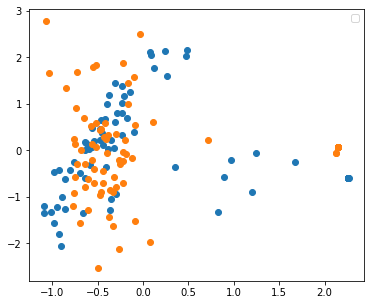

In [ ]:
#@title
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
comp = 2
pca_x = PCA(n_components=comp, whiten=True)
X= imp_exc

# X =acsf_imp
pca_x.fit(X)
# Project the data in 2D

X_pca = pca_x.transform(X)


pca_y = PCA(n_components=comp, whiten=True)
Y= imp_inh

pca_y.fit(Y)
# Project the data in 2D

Y_pca = pca_y.transform(Y)

# Visualize the data
from matplotlib import pyplot as plt
if comp ==2:
  plt.figure(figsize=(6, 5))
  plt.scatter(X_pca[:,0],X_pca[:,1])
  plt.scatter(Y_pca[:,0],Y_pca[:,1])

  plt.legend()
  plt.show()


if comp ==3:
  fig = plt.figure(figsize=[10,10])
  ax = fig.add_subplot(projection='3d')
  ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2])
  plt.show()
  fig = plt.figure(figsize=[10,10])
  ax = fig.add_subplot(projection='3d')

  ax.scatter(Y_pca[:,0],Y_pca[:,1],Y_pca[:,2])

  plt.legend()
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA in

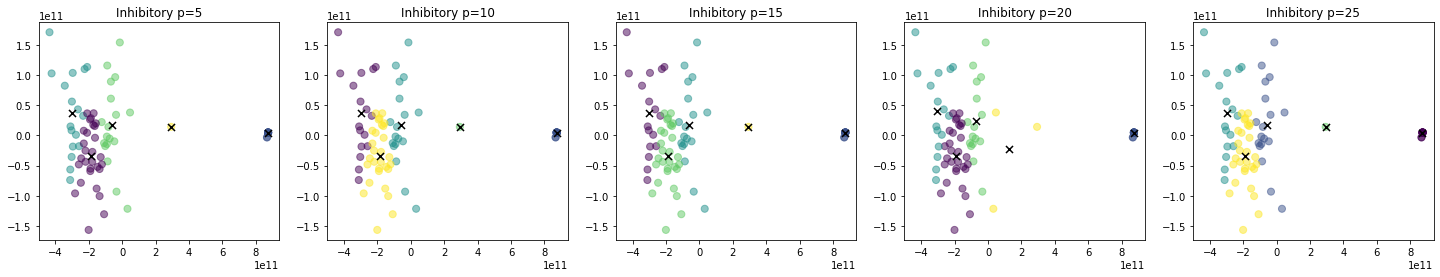

In [ ]:
#@title

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
data = imp_inh
pca_x = PCA(n_components=10,whiten=True)#.fit_transform(total_imp[:281,:])
pca_x.fit(data)
fig, ax = plt.subplots(1,5,figsize=[25,4])

# Project the data in 2D
#total_imp[:281,:]
reduced_data = pca_x.transform(data)
n_components = 2
perplexity_ = np.arange(5,26,5)
for p,j in enumerate(perplexity_):
  tsne = manifold.TSNE(
      n_components=n_components,
      init="pca",
      random_state=0,
      perplexity=j,
      learning_rate="auto",
      n_iter=400,)

  reduced_data = tsne.fit_transform(np.array(data))


  kmeans = KMeans(n_clusters=5).fit(reduced_data)
  centroids = kmeans.cluster_centers_
  label = kmeans.labels_.astype(float)
  xs = np.repeat('x',281)
  os = np.repeat('o',418-281)
  mark = np.concatenate((xs,os))
  mark
  labels  = [] 
  for i in  kmeans.labels_.astype(float):
    if i ==0:
      labels.append('r')
    if i ==1:
      labels.append('b')
    if i ==2:
      labels.append('green')
    if i ==3:
      labels.append('cyan')
    if i ==4:
      labels.append('purple')                
  ax[p].scatter(reduced_data[:,0], reduced_data[:,1], c=label, s=50, alpha=0.5,marker = 'o')
  ax[p].scatter(centroids[:, 0], centroids[:, 1],c='black', s=50,marker = 'x')
  # ax[p].set_xlabel('PC1')
  # ax[p].set_ylabel('PC2')
  ax[p].set_title('Inhibitory p='+str(j))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA in

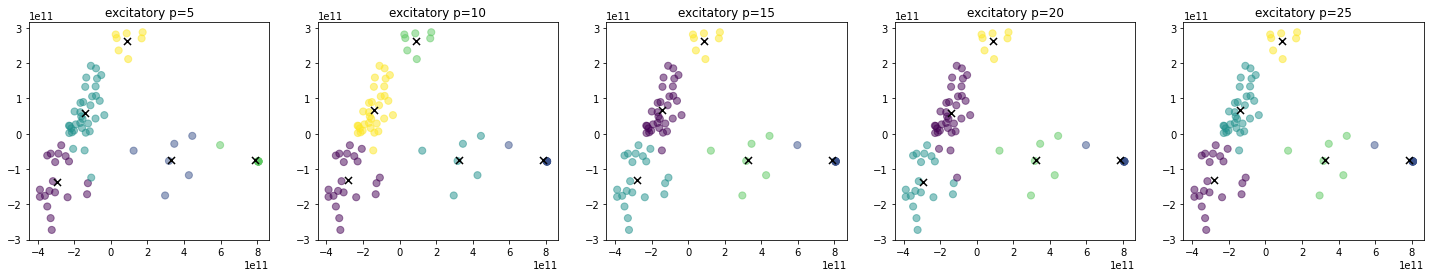

In [ ]:
#@title
data = imp_exc
pca_x = PCA(n_components=10,whiten=True)#.fit_transform(total_imp[:281,:])
pca_x.fit(data)
fig, ax = plt.subplots(1,5,figsize=[25,4])

# Project the data in 2D
#total_imp[:281,:]
reduced_data = pca_x.transform(data)
n_components = 2
perplexity_ = np.arange(5,26,5)
for p,j in enumerate(perplexity_):
  tsne = manifold.TSNE(
      n_components=n_components,
      init="pca",
      random_state=0,
      perplexity=j,
      learning_rate="auto",
      n_iter=400,)

  reduced_data = tsne.fit_transform(np.array(data))


  kmeans = KMeans(n_clusters=5).fit(reduced_data)
  centroids = kmeans.cluster_centers_
  label = kmeans.labels_.astype(float)
  xs = np.repeat('x',281)
  os = np.repeat('o',418-281)
  mark = np.concatenate((xs,os))
  mark
  labels  = [] 
  for i in  kmeans.labels_.astype(float):
    if i ==0:
      labels.append('r')
    if i ==1:
      labels.append('b')
    if i ==2:
      labels.append('green')
    if i ==3:
      labels.append('cyan')
    if i ==4:
      labels.append('purple')                
  ax[p].scatter(reduced_data[:,0], reduced_data[:,1], c=label, s=50, alpha=0.5,marker = 'o')
  ax[p].scatter(centroids[:, 0], centroids[:, 1],c='black', s=50,marker = 'x')
  # ax[p].set_xlabel('PC1')
  # ax[p].set_ylabel('PC2')
  ax[p].set_title('excitatory p='+str(j))
plt.show()

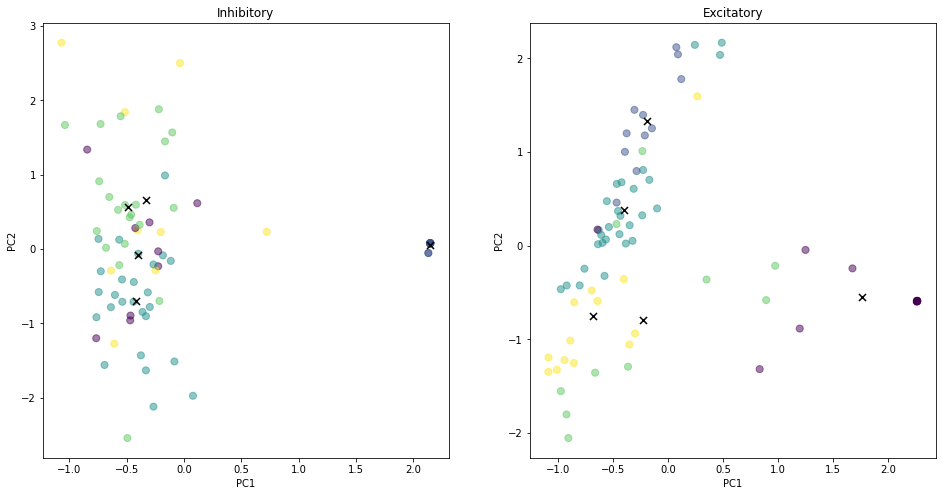

In [ ]:
#@title
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
data = imp_inh
pca_x = PCA(n_components=10,whiten=True)#.fit_transform(total_imp[:281,:])
pca_x.fit(data)
fig, ax = plt.subplots(1,2,figsize=[16,8])

# Project the data in 2D
#total_imp[:281,:]
reduced_data_inh = pca_x.transform(data)
n_components = 2

kmeans = KMeans(n_clusters=5).fit(reduced_data_inh)
centroids_inh = kmeans.cluster_centers_
label = kmeans.labels_.astype(float)
xs = np.repeat('x',281)
os = np.repeat('o',418-281)
mark = np.concatenate((xs,os))
mark
labels  = [] 
for i in  kmeans.labels_.astype(float):
  if i ==0:
    labels.append('r')
  if i ==1:
    labels.append('b')
  if i ==2:
    labels.append('green')
  if i ==3:
    labels.append('cyan')
  if i ==4:
    labels.append('purple')                
ax[0].scatter(reduced_data_inh[:,0], reduced_data_inh[:,1], c=label, s=50, alpha=0.5,marker = 'o')
ax[0].scatter(centroids_inh[:, 0], centroids_inh[:, 1],c='black', s=50,marker = 'x')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Inhibitory')
# plt.show()

data = imp_exc
pca_x = PCA(n_components=10,whiten=True)#.fit_transform(total_imp[:281,:])
pca_x.fit(data)
# fig, ax = plt.subplots(figsize=[8,8])

# Project the data in 2D
#total_imp[:281,:]
reduced_data_exc = pca_x.transform(data)
n_components = 2

kmeans = KMeans(n_clusters=5).fit(reduced_data_exc)
centroids_exc = kmeans.cluster_centers_
label = kmeans.labels_.astype(float)
xs = np.repeat('x',281)
os = np.repeat('o',418-281)
mark = np.concatenate((xs,os))
mark
labels  = [] 
for i in  kmeans.labels_.astype(float):
  if i ==0:
    labels.append('r')
  if i ==1:
    labels.append('b')
  if i ==2:
    labels.append('green')
  if i ==3:
    labels.append('cyan')
  if i ==4:
    labels.append('purple')                
ax[1].scatter(reduced_data_exc[:,0], reduced_data_exc[:,1], c=label, s=50, alpha=0.5,marker = 'o')
ax[1].scatter(centroids_exc[:, 0], centroids_exc[:, 1],c='black', s=50,marker = 'x')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Excitatory')
plt.show()

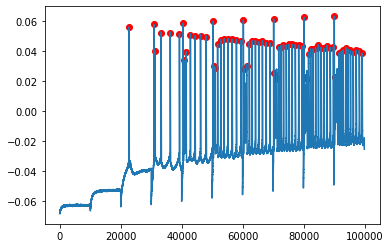

[89967, 90120, 90897, 91553, 92213, 92877, 93710, 94467, 95267, 96167, 97147, 98170, 99097]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


IndexError: ignored

In [ ]:
dat = loadmat(path+'/'+'xuan_27-5-20-E3-CCSTEP-NODRUG.mat')
isi,widths = half_width(dat,plot=True)

# V = []
# I = []
# I_ = []
# V_ = []

# for i in dat.keys():
#   if 'Trace' in i and i[-1]=='1' :
#       I.append(np.array(dat[i][onset[0]:offset[0],1]))
# for v in dat.keys():
#   if 'Trace' in v and v[-1]=='2' :
#       V.append(np.array(dat[v][onset[0]:offset[0],1]))
# for m in V:
#   V_ = np.concatenate((V_,m))

 

In [ ]:
V = []
I = []
I_ = []
V_ = []

for i in data_1.keys():
  if 'Trace' in i and i[-1]=='1' :
      I.append(np.array(data_1[i][onset[0]:offset[0],1]))
for v in data_1.keys():
  if 'Trace' in v and v[-1]=='2' :
      V.append(np.array(data_1[v][onset[0]:offset[0],1]))
for v in V:
  V_ = np.concatenate((V_,v))

spikes = []
size = len(V_)
size_i = size//10

all_peaks = find_peaks(V_,threshold=0.0001)
print(all_peaks)
for i in range(10):
  temp = all_peaks[0][all_peaks[0]>i*9980]
  temp = temp[temp<(i+1)*9980]
  spikes.append(temp)
spikes = np.array(spikes,dtype=object)
plt.plot(V[9])
plt.scatter(spikes[9]-size_i*9,V_[spikes[9]-size_i*9])

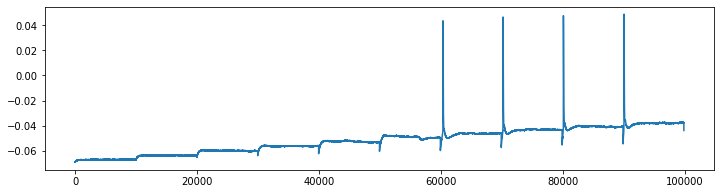

In [ ]:
data_1  = loadmat(path+'/'+prob[0])

V = []
I = []
I_ = []
V_ = []

for i in data_1.keys():
  if 'Trace' in i and i[-1]=='1' :
      I.append(np.array(data_1[i][onset[0]:offset[0],1]))

for v in data_1.keys():
  if 'Trace' in v and v[-1]=='2' :
      V.append(np.array(data_1[v][onset[0]:offset[0],1]))
for v in V:
  V_ = np.concatenate((V_,v))
plt.plot(V_)

#find spikes
reldet = qs.detector(2.5, 30)
samples = np.array(V_)
reldet.scale_thresh(samples.mean(), samples.std())
times = reldet.send(samples)

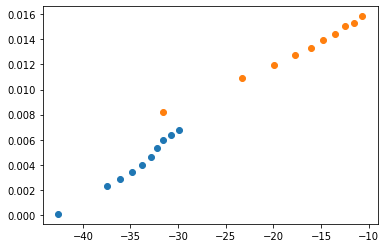

In [ ]:
# all_peaks = find_peaks(V[9][4000:5150],threshold=0.00026)

V_t = np.array(data_tp2['V'])
mask = np.zeros_like(V_t)
size = mask.size//10
mask[9*size:10*size] = 1
V_int = []
I_int = []

for i in range(10):
  reldet = qs.detector(1.5, 20)
  samples = np.array(V_t[size*i:size*(i+1)])
  I = data_tp2['V'][size*i:size*(i+1)]
  I_int.append(np.mean(I))
  reldet.scale_thresh(samples.mean(), samples.std())
  times = reldet.send(samples)
  times = np.array(times)
  V_int.append(np.size(times)/size)
# plt.plot(V_t[:size])

# plt.scatter(times,V_t[:size][times],c='r')
plt.scatter(I_int,V_int)
# plt.show()

V_t = np.array(data_tp1['V'])
mask = np.zeros_like(V_t)
size = mask.size//10
mask[9*size:10*size] = 1
V_int = []
I_int = []

for i in range(10):
  reldet = qs.detector(1.5, 20)
  samples = np.array(V_t[size*i:size*(i+1)])
  I = data_tp1['V'][size*i:size*(i+1)]
  I_int.append(np.mean(I))
  reldet.scale_thresh(samples.mean(), samples.std())
  times = reldet.send(samples)
  times = np.array(times)
  V_int.append(np.size(times)/size)
# plt.plot(V_t[:size])

# plt.scatter(times,V_t[:size][times],c='r')
plt.scatter(I_int,V_int)


In [ ]:
# plt.plot(V_t[times[8]-500:times[8]+300])
# plt.show()
# plt.plot(np.diff(V_t[times[8]-100:times[8]+100]))
def find_half_width(ind, V):
  half = V[ind-100:ind]
  ind_half = np.where(half<-0.01)[0]
  width= len(half[ind_half[-1]:ind])
  return width
widths = []
for i in times:
  widths.append(find_half_width(i,V_))

np.mean(widths)

18.916666666666668

In [ ]:
fig,ax = plt.subplots(1,1,figsize=[10,10])
ax.plot(np.array(imp).T)
ax.set_xscale('log')
ax.set_yscale('log') 

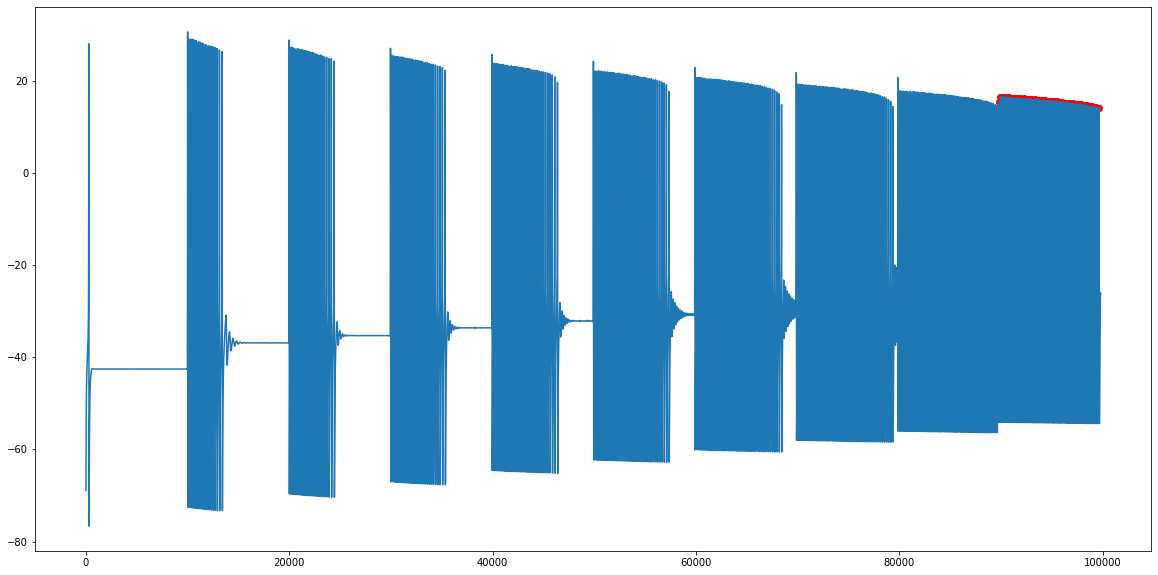

In [ ]:
import plotly.graph_objects as go
import pandas as pd
from scipy.signal import find_peaks
spikes = []
V = data_tp2['V']
size = len(V)
size_i = size//10

all_peaks = find_peaks(V,threshold=0.008)
for i in range(10):
  temp = all_peaks[0][all_peaks[0]>i*9980]
  temp = temp[temp<(i+1)*9980]
  spikes.append(temp)
spikes = np.array(spikes,dtype=object)
fig,ax = plt.subplots(1,1,figsize =[20,10])
ax.plot(V)

# np.array(data['V'])[np.array(all_peaks)]
ax.scatter(spikes[9][:-1],np.array(V)[spikes[9][:-1]],c='r')
# np.array(all_peaks[0])

In [ ]:
np.diff(spikes[9])

array([131, 133, 132, 133, 134, 134, 134, 135, 134, 136, 136, 136, 136,
       137, 137, 138, 138, 138, 139, 139, 139, 140, 141, 140, 141, 142,
       142, 143, 143, 144, 144, 144, 145, 145, 146, 147, 147, 147, 148,
       149, 149, 150, 150, 151, 152, 152, 152, 153, 154, 155, 155, 157,
       156, 157, 158, 159, 159, 161, 161, 162, 163, 163, 165, 165, 167,
       168, 168, 128])

In [ ]:
from scipy.io import savemat 
import os 
savemat('/content/new.mat',{'V':np.array(data['V']),'I':np.array(data['I']),'spikes':spikes},)

In [ ]:
from numpy.fft import fft, ifft
for i,v in zip(data['V'],data['I'])
Imp = fft(data['V'])/fft(data['I'])

plt.plot(fft(data['I']**2))

SyntaxError: ignored

In [ ]:
fft(data['V'])

TypeError: ignored

(9980,)


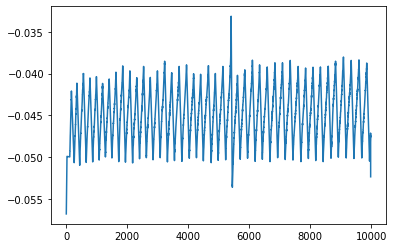

In [ ]:
# function V_ = return_stiched_spike_train(voltage,indices)
# V= voltage;
# spikes = indices;
# left = 60;
# right = 60; 
# empty_cell = {};
# count = 0 ;
# for i = spikes
#     disp('here')
#     empty_cell{end+1} = i-left:i+right;
#     V1 = V(i-left);
#     V2 = V(i+right);
#     if V1~=V2
#         div = (V2-V1)/(left+right);
#         V(i-left:i+right) = V1:div:V2 ;
#     else
#         V(i-left:i+right) = ones(1,left+right+1)*V1 ;  
#         disp('here1')
#     end
# end
# V_ = V;
# end 
def cut_spikes(V, spikes):
  v= V
  spks= spikes
  left  = 10
  right = 20 
  print(v.shape)
  for i in spikes:
    V1 = v[i-left]
    V2 = v[i+right]
    if V1!=V2:
      div  = (V2-V1)/(left+right)
      v[i-left:i+right] = np.arange(V1,V2,div)
    else:
      v[i-left:i+right] = np.ones(left+right)*V1


  V_ = v
  return v

plt.plot(cut_spikes(v[9],index[1]))

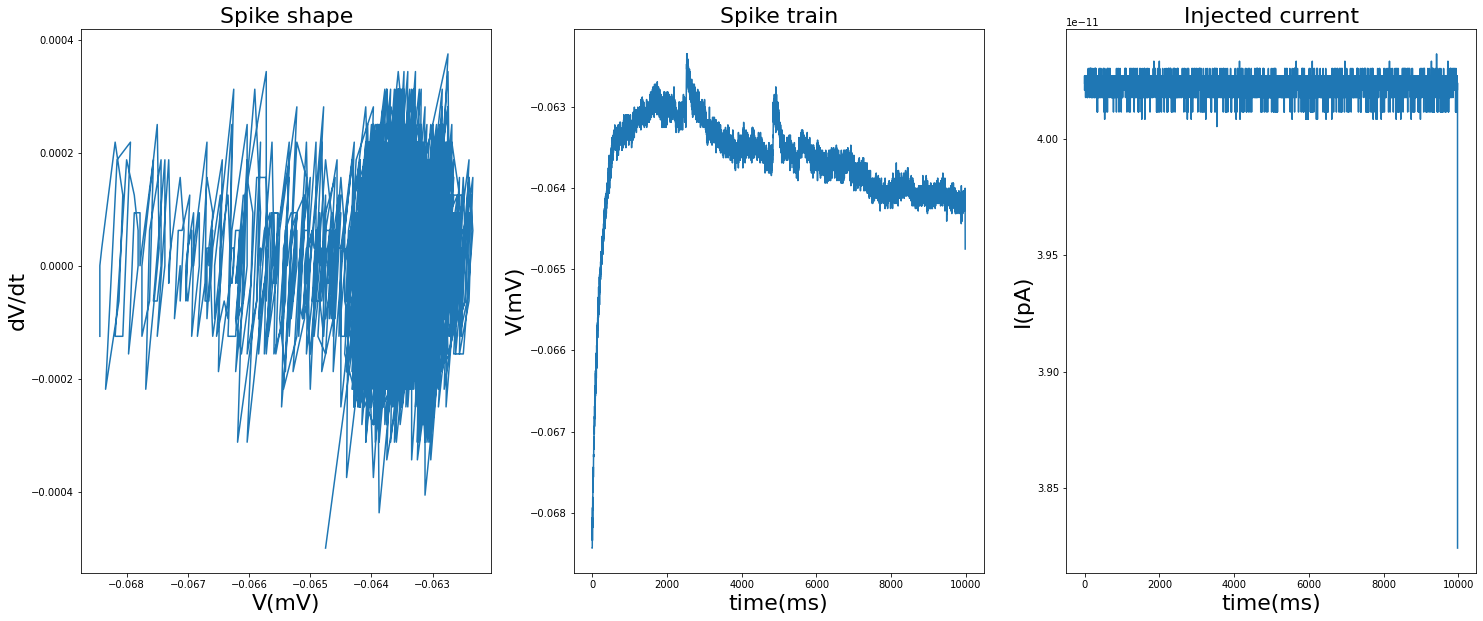

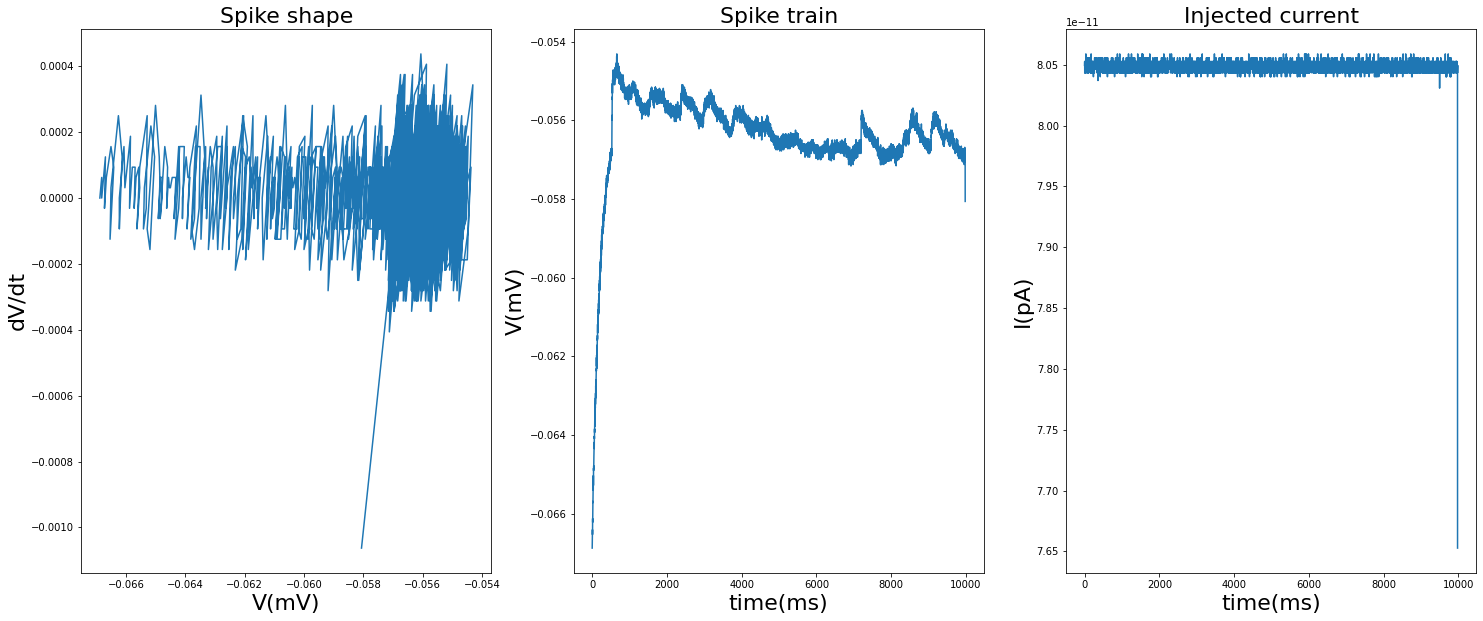

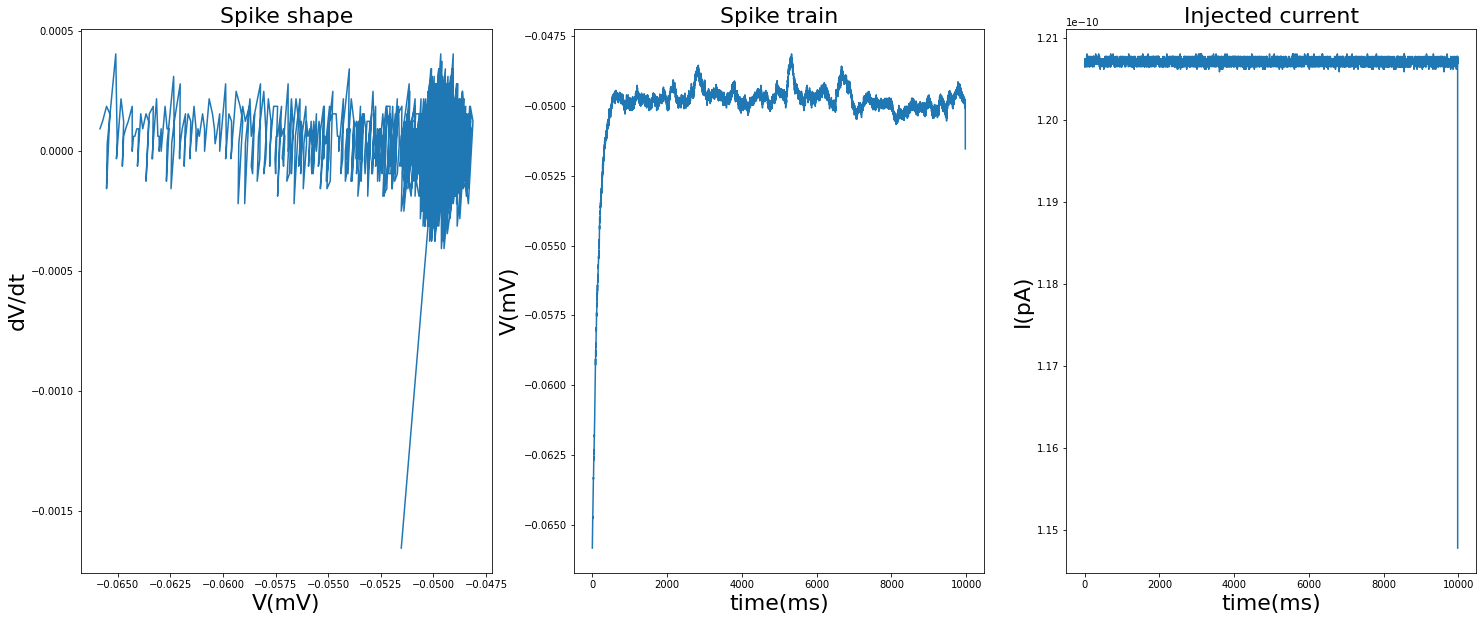

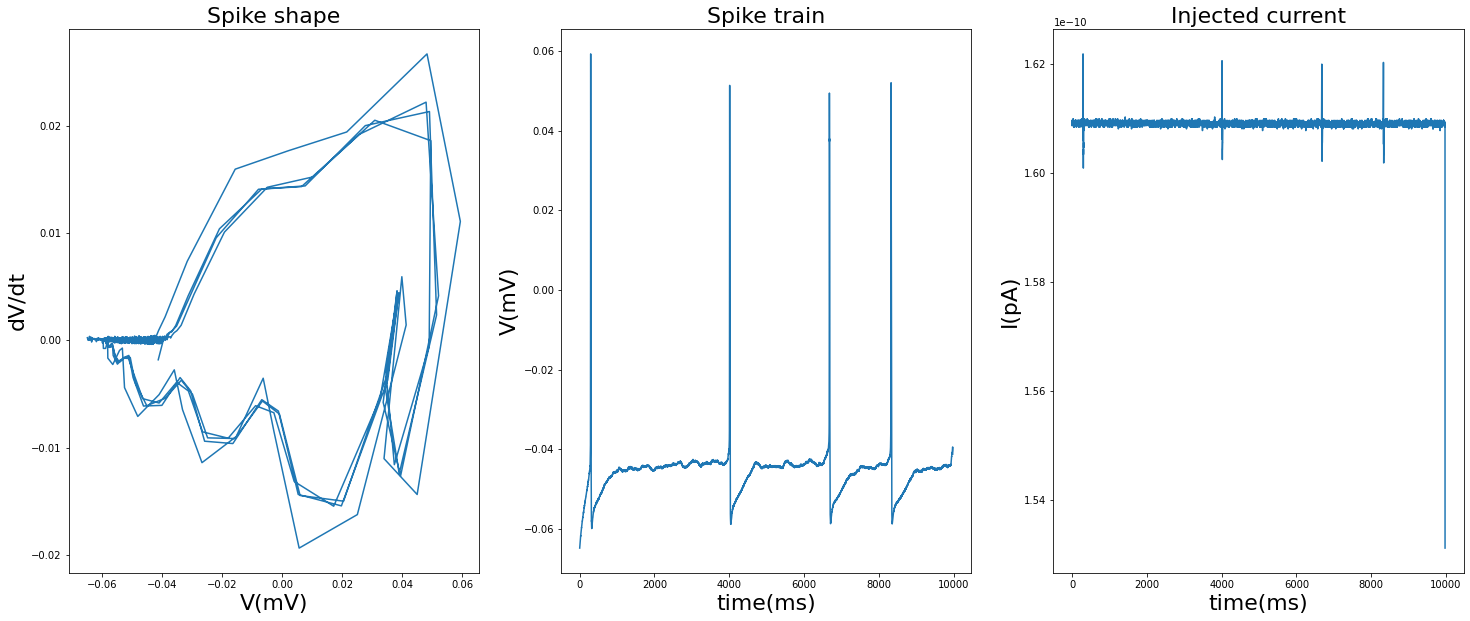

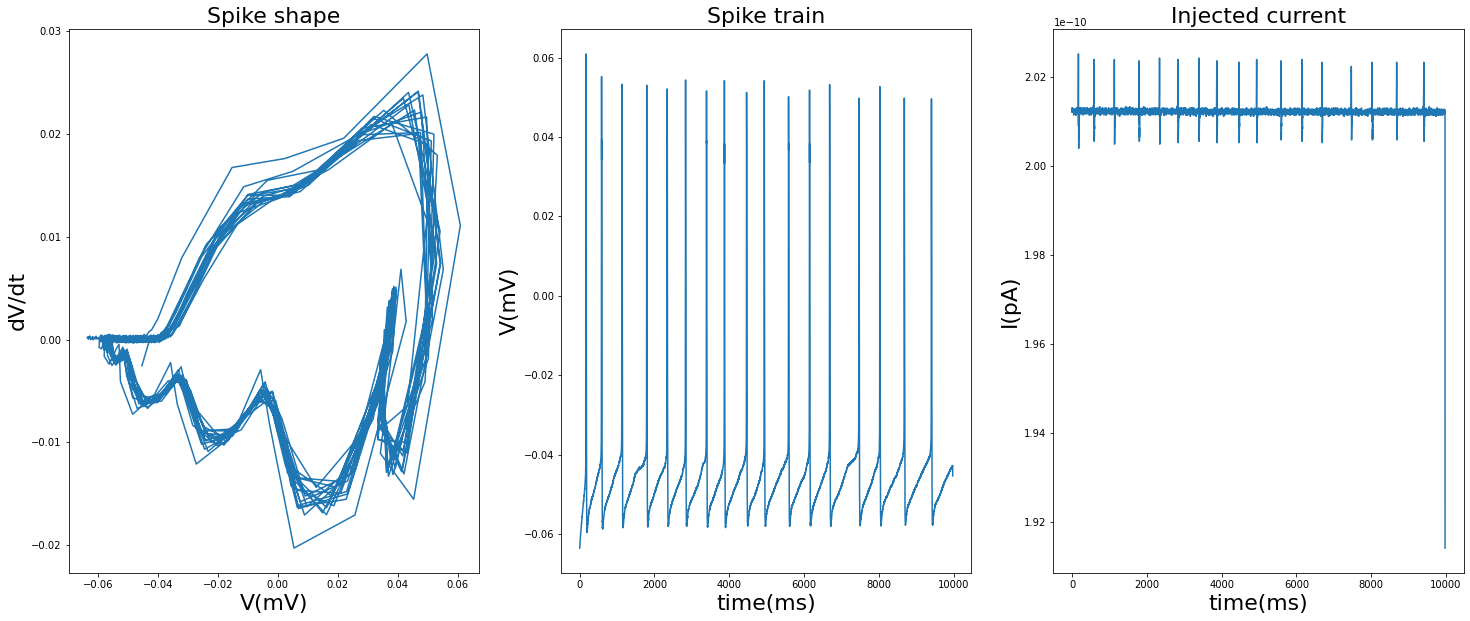

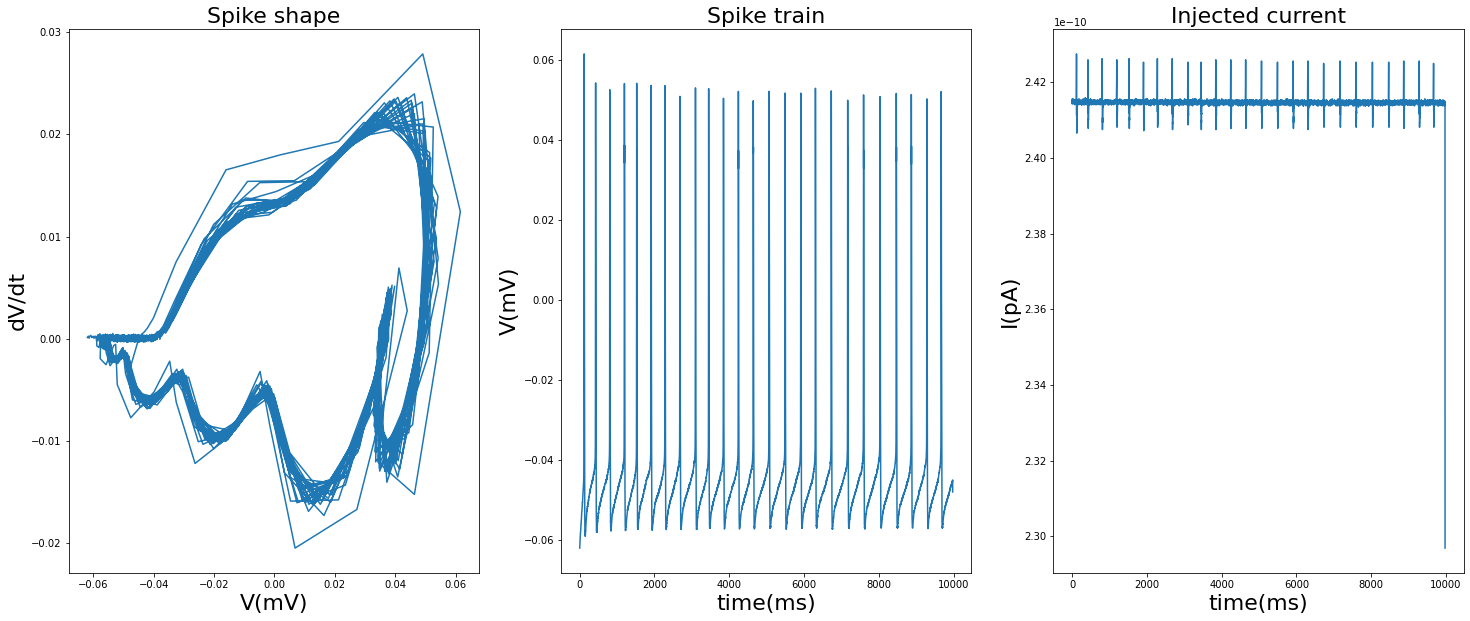

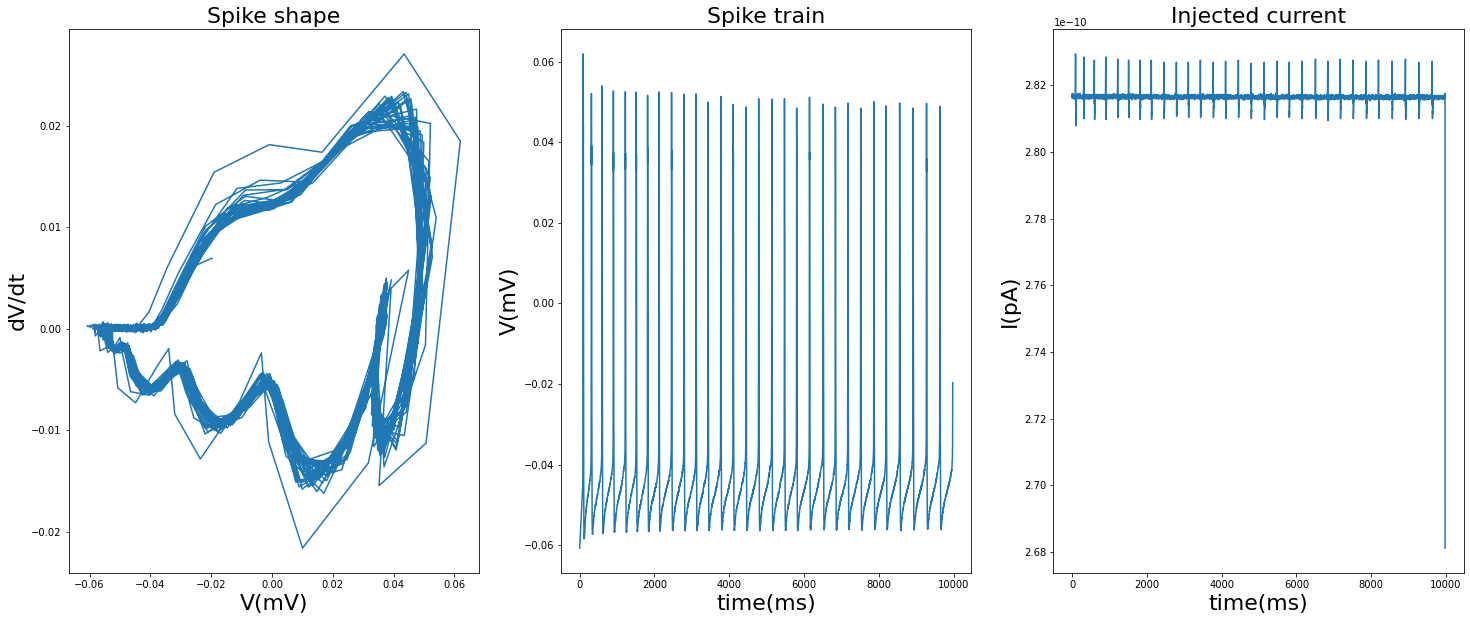

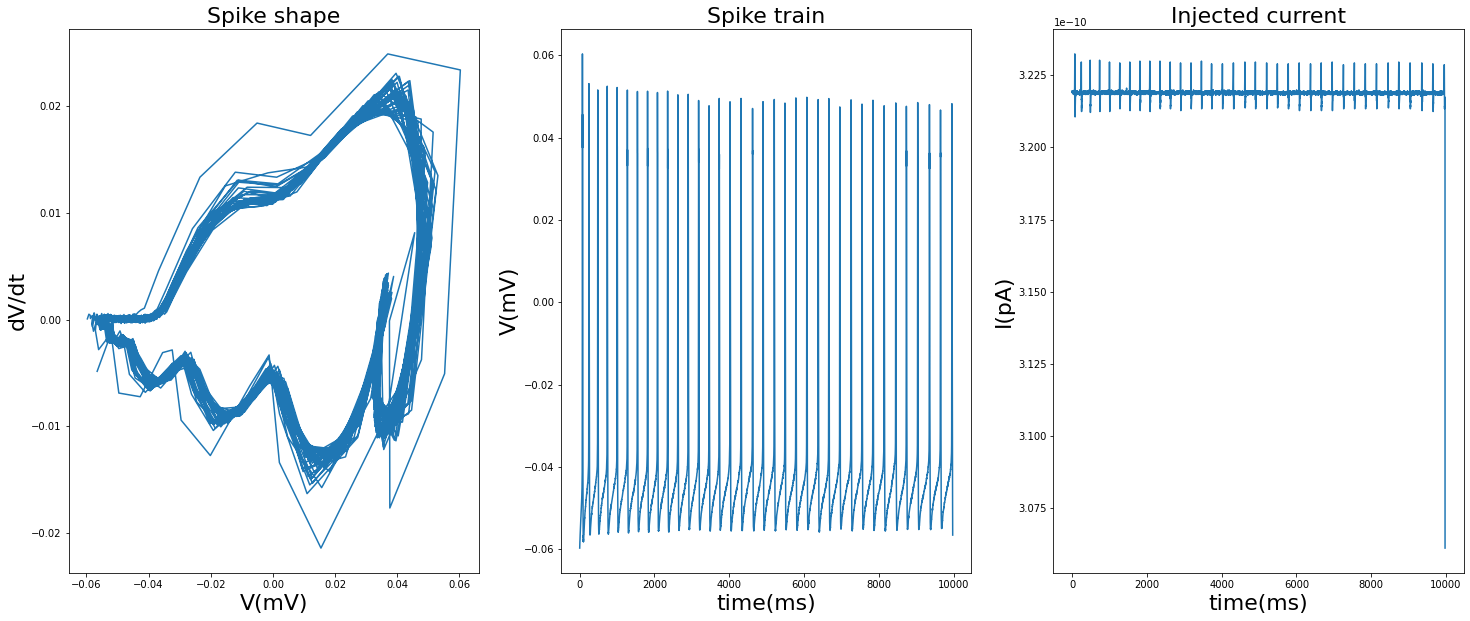

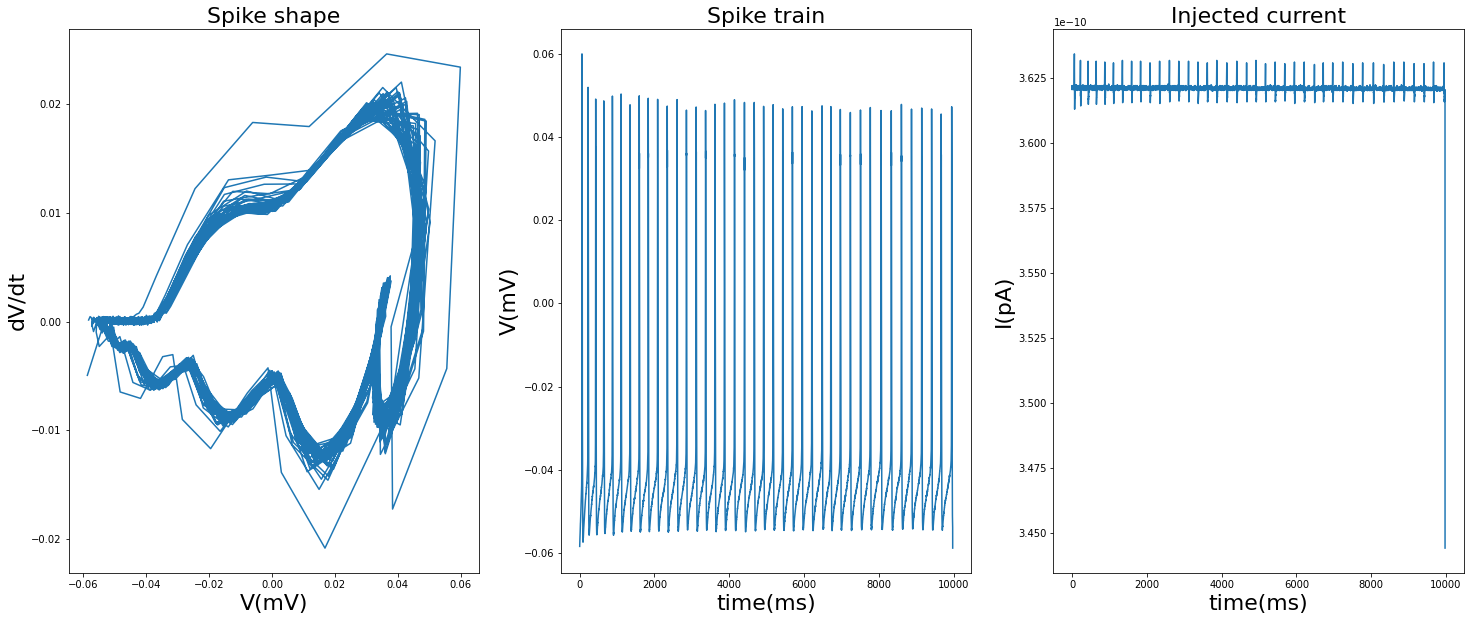

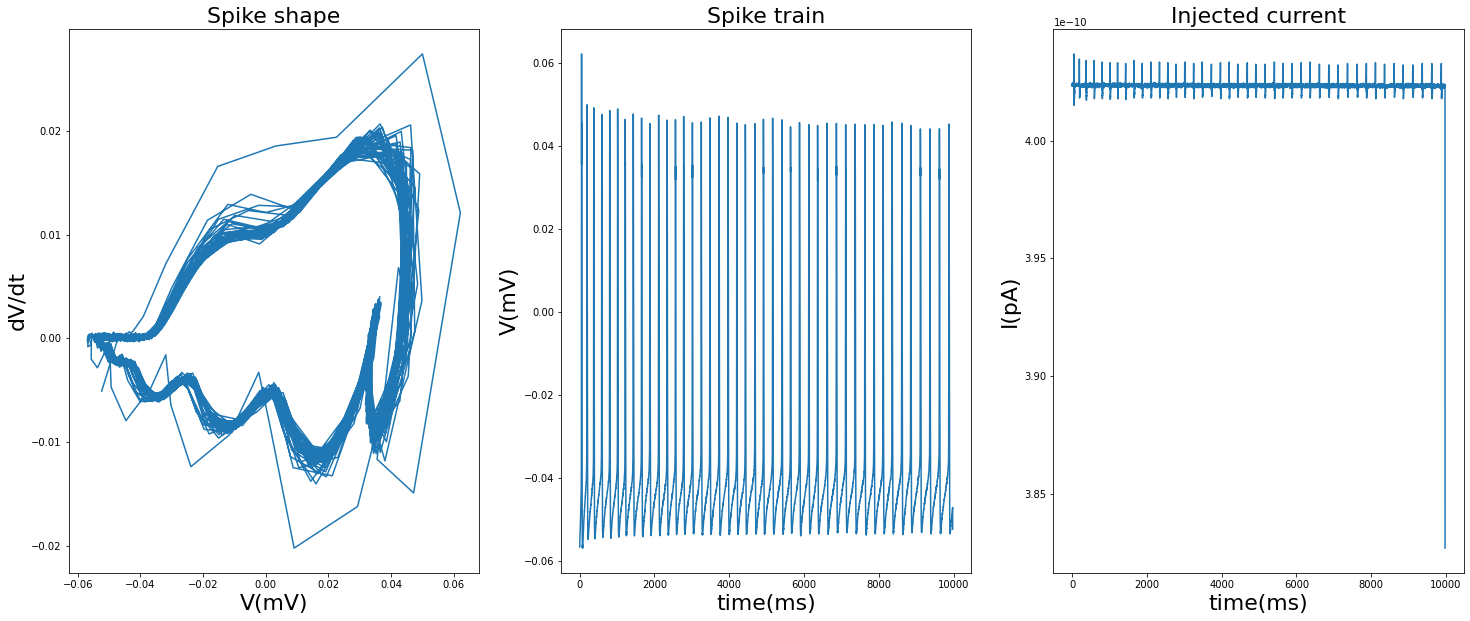

In [ ]:
for i in range(len(v)):
  fig,ax = plt.subplots(1,3,figsize=[25,10])
  ax[0].plot(v[i][1:],np.diff(v[i]))
  ax[0].set_xlabel('V(mV)',fontsize=22)
  ax[0].set_ylabel('dV/dt',fontsize=22)
  ax[0].set_title('Spike shape',fontsize=22)
  ax[1].plot(v[i][1:])
  ax[1].set_xlabel('time(ms)',fontsize=22)
  ax[1].set_ylabel('V(mV)',fontsize=22)
  ax[1].set_title('Spike train',fontsize=22)

  ax[2].plot(I[i][1:])
  ax[2].set_xlabel('time(ms)',fontsize=22)
  ax[2].set_ylabel('I(pA)',fontsize=22)
  ax[2].set_title('Injected current',fontsize=22)
  plt.show()

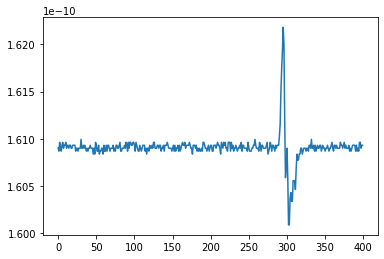

In [ ]:
plt.plot(I[3][:400])

In [ ]:


import numpy as np
from brian2 import *
from brian2modelfitting import *
#-----------------------------------------------------------------

# Model Fitting
## Parameters
# area = 20000*umetre**2
# # Cm = 1*uF # /cm**2
# Iapp = 2*uA
# # gL = 0.1*msiemens
# dt = 0.01*ms
# EL = -65*mV
# ENa = 55*mV
# EK = -90*mV
# gNa = 35*msiemens
# gK = 9*msiemens

# eqs = '''
# dv/dt = (-gNa*m**3*h*(v-ENa)-gK*n**4*(v-EK)-gL*(v-EL)+Iapp)/Cm : volt
# m = alpha_m/(alpha_m+beta_m) : 1
# alpha_m = 0.1/mV*10*mV/exprel(-(v+35*mV)/(10*mV))/ms : Hz
# beta_m = 4*exp(-(v+60*mV)/(18*mV))/ms : Hz
# dh/dt = 5*(alpha_h*(1-h)-beta_h*h) : 1
# alpha_h = 0.07*exp(-(v+58*mV)/(20*mV))/ms : Hz
# beta_h = 1./(exp(-0.1/mV*(v+28*mV))+1)/ms : Hz
# dn/dt = 5*(alpha_n*(1-n)-beta_n*n) : 1
# alpha_n = 0.01/mV*10*mV/exprel(-(v+34*mV)/(10*mV))/ms : Hz
# beta_n = 0.125*exp(-(v+44*mV)/(80*mV))/ms : Hz
# gNa : siemens (constant)
# gK : siemens (constant)
# gL   : siemens (constant)
# Cm   : farad (constant)
# '''
#-----------------------------------------------------------------

# Parameters
area = 20000*umetre**2
EL = -65*mV
EK = -90*mV
ENa = 50*mV
dt = 0.5*ms
VT = -63*mV
param = math.log(10) #used in neuron equations


# Model Definition with all parameters to be fitted
eqs = Equations(
'''
dv/dt = (gL*(EL-v) - gNa*(m*m*m)*h*(v-ENa) - gK*(n*n*n*n)*(v-EK) + I)/Cm : volt
m = 1/(1+exp(-(v-Vh_m)/k_m)) : 1
Vh_m = 3.583881*k_m-53.294451*mV : volt
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
h = 1/(1+exp((v-Vh_h)/k_h)) : 1

gK   : siemens (constant)
gL   : siemens (constant)
Cm   : farad (constant)
gNa  : siemens (constant)
k_m    : volt
Vh_h   : volt
k_h    : volt
''')


## Optimization and Metric Choice
n_opt = NevergradOptimizer()
metric = MSEMetric()

## Fitting
# fitter = TraceFitter(model=eqs, input_var='Iapp', output_var='v',
#                      input=inp_trace*amp, output=out_trace*mV, dt=dt,
#                      n_samples=20,
#                      param_init={'v': -65*mV},
#                      method='exponential_euler')

# res, error = fitter.fit(n_rounds=2,
#                         optimizer=n_opt, metric=metric,
#                         callback='progressbar',
#                         gL = [1e-09 *siemens, 1e-07 *siemens],
#                         gNa = [2e-06*siemens, 2e-04*siemens],
#                         gK = [6e-07*siemens, 6e-05*siemens],
#                         Cm=[0.1*ufarad*cm**-2 * area, 2*ufarad*cm**-2 * area])


# ## Fitting
fitter = TraceFitter(model=eqs, input_var='I', output_var='v',
                      input=inp_trace*amp, output=out_trace*mV, dt=dt,
                      n_samples=20,
                      param_init={'v': -65*mV},
                      method='euler')

res, error_trace = fitter.fit(restart=True,
                            n_rounds=20,
                            optimizer=n_opt, metric=metric,
                            callback='progressbar',
                            gL = [1e-09 *msiemens, 1e-07 *msiemens],
                            gK = [6e-07*msiemens, 6e-05*msiemens],
                            Cm = [0.1*ufarad*cm**-2 * area, 2*ufarad*cm**-2 * area],
                            gNa = [2e-06*msiemens, 2e-04*msiemens],
                            k_m = [0*mV, 20*mV],
                            Vh_h = [-60*mV, 0*mV],
                            k_h = [0*mV, 20*mV])




## Show results
all_output = fitter.results(format='dataframe')
print(all_output)

# Second round
# res, error = fitter.fit(restart=True,
#                         n_rounds=20,
#                         optimizer=n_opt, metric=metric,
#                         callback='progressbar',
#                         gL = [1e-09 *siemens, 1e-07 *siemens],
#                         gNa = [2e-06*siemens, 2e-04*siemens],
#                         gK = [6e-07*siemens, 6e-05*siemens],
#                         Cm=[0.1*ufarad*cm**-2 * area, 2*ufarad*cm**-2 * area])

  0%|          | 0/20 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

Results in dataframes do not support units. Specify "use_units=False" to avoid this warning.


               gL            gK            Cm  ...      Vh_h           gNa     error
0    2.118905e-11  3.384024e-08  7.811884e-11  ... -0.041821  1.614225e-07  0.004219
1    4.956736e-11  1.782537e-08  1.165943e-10  ... -0.040104  1.596531e-07  0.004219
2    1.710371e-11  4.593559e-08  2.313611e-10  ... -0.035566  7.693146e-08  0.004219
3    8.417229e-11  3.861086e-08  2.735975e-10  ... -0.043252  7.631141e-08  0.004219
4    2.129347e-11  4.432535e-08  2.418573e-10  ... -0.025974  1.256957e-07  0.004219
..            ...           ...           ...  ...       ...           ...       ...
395  5.350430e-11  2.145241e-08  1.931439e-10  ... -0.031109  1.924201e-08  0.004219
396  7.930572e-11  9.135259e-09  9.827355e-11  ... -0.024669  1.796958e-07  0.004219
397  2.845556e-11  1.935105e-08  2.998186e-10  ... -0.053134  1.710719e-07  0.004219
398  7.599589e-11  1.367612e-08  3.503960e-10  ... -0.055987  1.450481e-07  0.004219
399  1.727800e-11  3.337756e-08  9.047144e-11  ... -0.014954  1.5

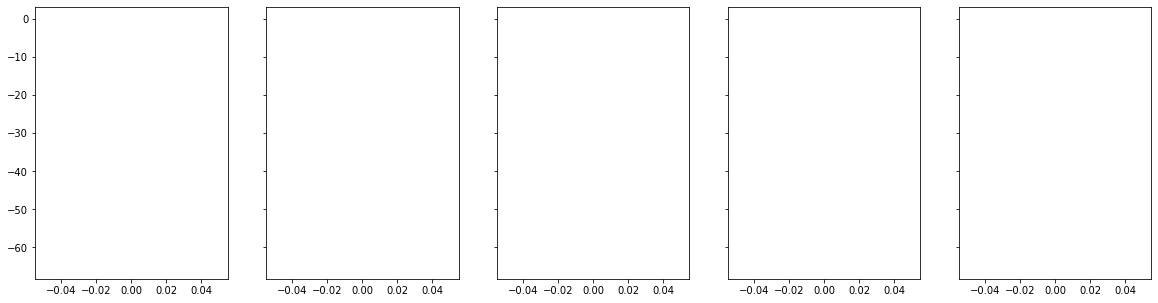

In [ ]:
## Show results
all_output = fitter.results(format='dataframe')
print(all_output)

## Visualization of the results
fits = fitter.generate_traces(params=None, param_init={'v': -65*mV})

fig, axes = plt.subplots(ncols=5, figsize=(20,5), sharey=True)

for ax, data, fit in zip(axes, out_trace, fits):
    ax.plot(data.transpose())
    ax.plot(fit.transpose()/mV)

plt.show()

In [ ]:
!rm -rf /content/output

In [ ]:
def join_cond(lis_cond = None):
  path = '/content/gdrive/MyDrive/lists/all_files_new.csv'
  a = pd.read_csv(path)
  cond= np.sort(np.unique(a['condition']))
  temp = []
  if len(lis_cond)>1:
    for i in lis_cond:
      
      temp.append(a.groupby('condition').get_group(i))
    new_df = temp[0]
    for j in range(1,len(temp)):
      new_df = pd.concat([new_df,temp[j]])
  else:
    new_df = a.groupby('condition').get_group(lis_cond[0])
  return new_df

In [ ]:
path = '/content/gdrive/MyDrive/lists/all_files_new.csv'
a = pd.read_csv(path)
cond= np.sort(np.unique(a['condition']))
path_i = '/content/gdrive/MyDrive/Analyzed/'
cond_i = 'aCSF'
new_a = a.groupby('condition').get_group(cond_i)
new_a_inh = new_a.groupby('tau').get_group(50)
exp_name = np.array(new_a_inh['experimentname'])
trial = np.array(new_a_inh['trialnr'])
exp_ = 10
try:
  data  = loadmat_(path_i+exp_name[exp_]+'_analyzed.mat')
except:
  data  = loadmat_(path_i+'Copy of '+exp_name[exp_]+'_analyzed.mat')


In [ ]:
new_a_inh

Unnamed: 0             experimentname condition  trialnr  tau  \
117         117       NC_170627_DopD2D1_E1      aCSF        1   50   
119         119    NC_170628_aCSF_D1ago_E1      aCSF        1   50   
120         120    NC_170628_aCSF_D1ago_E2      aCSF        1   50   
121         121    NC_170630_aCSF_D1ago_E3      aCSF        1   50   
122         122    NC_170630_aCSF_D1ago_E4      aCSF        1   50   
123         123    NC_170630_aCSF_D1ago_E4      aCSF        2   50   
125         125    NC_170703_aCSF_D1ago_E1      aCSF        1   50   
127         127    NC_170703_aCSF_D1ago_E2      aCSF        1   50   
151         151  NC_170718_aCSF_DopD2D1_E3      aCSF        1   50   
176         176  NC_170725_aCSF_DopD2D1_E3      aCSF        1   50   
178         178  NC_170726_aCSF_DopD2D1_E1      aCSF        1   50   
180         180  NC_170726_aCSF_DopD2D1_E5      aCSF        1   50   
183         183  NC_170727_aCSF_DopD2D1_E1      aCSF        1   50   
187         187  NC_170728_aCSF_DopD2D1_E2      aCSF        1   50   
193         193    NC_170801_aCSF_D1ago_E2      aCSF        1   50   
200         200    NC_170814_aCSF_D1ago_E2      aCSF        1   50   
201         201    NC_170814_aCSF_D1ago_E6      aCSF        1   50   
204         204    NC_170814_aCSF_D1ago_E9      aCSF        1   50   
206         206    NC_170815_aCSF_D1ago_E1      aCSF        1   50   
209         209    NC_170815_aCSF_D1ago_E3      aCSF        1   50   
214         214    NC_170815_aCSF_D1ago_E6      aCSF        1   50   
217         217    NC_170816_aCSF_D1ago_E1      aCSF        1   50   
219         219    NC_170816_aCSF_D1ago_E2      aCSF        1   50   
243         243    NC_170830_aCSF_D1ago_E6      aCSF        1   50   
249         249    NC_170914_aCSF_D1ago_E1      aCSF        1   50   
250         250    NC_170914_aCSF_D1ago_E1      aCSF        2   50   
262         262    NC_171010_aCSF_D1ago_E1      aCSF        2   50   
265         265    NC_171010_aCSF_D1ago_E3      aCSF        1   50   
267         267    NC_171010_aCSF_D1ago_E3      aCSF        3   50   
373         373    NC_171110_aCSF_D1ago_E1      aCSF        1   50   
375         375    NC_171110_aCSF_D1ago_E2      aCSF        1   50   
377         377    NC_171110_aCSF_D1ago_E3      aCSF        1   50   
379         379          NC_171207_aCSF_E1      aCSF        1   50   
383         383          NC_171207_aCSF_E3      aCSF        2   50   
386         386          NC_171207_aCSF_E4      aCSF        2   50   
387         387          NC_171207_aCSF_E5      aCSF        1   50   
391         391          NC_171207_aCSF_E6      aCSF        3   50   
392         392          NC_171207_aCSF_E6      aCSF        4   50   
407         407          NC_171211_aCSF_E1      aCSF        1   50   
408         408          NC_171211_aCSF_E2      aCSF        1   50   
435         435    NC_171220_aCSF_D1ago_E1      aCSF        1   50   
649         649          NC_170615_aCSF_E1      aCSF        4   50   
650         650          NC_170615_aCSF_E1      aCSF        5   50   
651         651          NC_170615_aCSF_E1      aCSF        6   50   
652         652          NC_170615_aCSF_E1      aCSF        7   50   
653         653       NC_170620_DopD2D1_E1      aCSF        1   50   
657         657    NC_170623_aCSF_D1ago_E4      aCSF        1   50   
659         659    NC_170626_aCSF_D1ago_E1      aCSF        1   50   
661         661    NC_170626_aCSF_D1ago_E2      aCSF        1   50   
663         663    NC_170626_aCSF_D1ago_E4      aCSF        1   50   
665         665    NC_170704_aCSF_D1ago_E2      aCSF        1   50   
666         666    NC_170704_aCSF_D1ago_E2      aCSF        2   50   
669         669  NC_170717_aCSF_DopD2D1_E1      aCSF        1   50   
674         674  NC_170718_aCSF_DopD2D1_E1      aCSF        1   50   
679         679  NC_170726_aCSF_DopD2D1_E4      aCSF        1   50   

                                           filename  
117       Copy of NC_170627_Do

Text(0, 0.5, 'dV/dt')

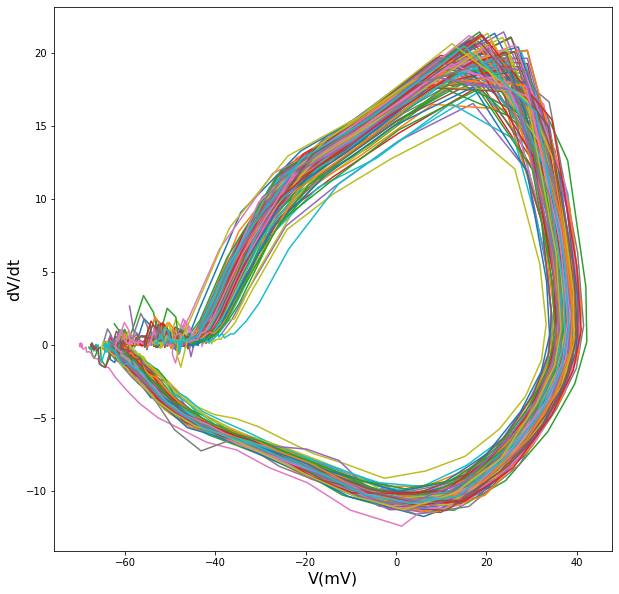

In [ ]:
spikes_acsf = data[0]['spikeindices']
  # ind = 
fig,ax = plt.subplots(1,1,figsize=[10,10])
# plt.plot((data[1]['membrane_potential'][spikes[i]-20:spikes[i]+20]))
for i in range(100):
#  ax[1].plot((data[0]['membrane_potential'][spikes_acsf[i]-20:spikes_acsf[i]+50]))
 ax.plot((data[0]['membrane_potential'][spikes_acsf[i]-50:spikes_acsf[i]+50])[1:],np.diff((data[0]['membrane_potential'][spikes_acsf[i]-50:spikes_acsf[i]+50])))
# plt.show()
ax.set_xlabel('V(mV)',fontsize=16)
ax.set_ylabel('dV/dt',fontsize=16)
# ax[1].set_xlabel('t(ms)',fontsize=16)
# ax[1].set_ylabel('V(mV)',fontsize=16)

In [ ]:
path = '/content/gdrive/MyDrive/lists/all_files_new.csv'
a = pd.read_csv(path)

cond= np.sort(np.unique(a['condition']))
path_i = '/content/gdrive/MyDrive/Analyzed/'
cond_i = 'aCSF'
new_a = a.groupby('condition').get_group(cond_i)
new_a_inh = new_a.groupby('tau').get_group(50)
exp_name = np.array(new_a_inh['experimentname'])
trial = np.array(new_a_inh['trialnr'])
# for i in range(len(trial)):
#   exp_ = i
#   try:
#     data  = loadmat_(path_i+exp_name[exp_]+'_analyzed.mat')
#   except:
#     data  = loadmat_(path_i+'Copy of '+exp_name[exp_]+'_analyzed.mat')

#   acsf = 0
#   ser = 1
#   spikes_acsf = data[0]['spikeindices']
#   # ind = 
#   fig,ax = plt.subplots(2,2)
#   # plt.plot((data[1]['membrane_potential'][spikes[i]-20:spikes[i]+20]))
#   for i in range(10):
#     ax[0,0].plot((data[0]['membrane_potential'][spikes_acsf[i]-20:spikes_acsf[i]+50]))
#   # plt.show()
#   spikes_ser = data[1]['spikeindices']
#   # ind = 
#   # plt.plot((data[1]['membrane_potential'][spikes[i]-20:spikes[i]+20]))
#   for i in range(10):
#     ax[0,1].plot((data[1]['membrane_potential'][spikes_ser[i]-20:spikes_ser[i]+50]))
#   # plt.show()
#   # spikes = data[0]['spikeindices']

#   # data[0]['input_generation_settings']
#   for i in range(len(spikes_acsf)):
#     ax[1,0].plot((data[0]['membrane_potential'][spikes_acsf[i]-50:spikes_acsf[i]+50])[1:],np.diff((data[0]['membrane_potential'][spikes_acsf[i]-50:spikes_acsf[i]+50])))

#   for i in range(len(spikes_ser)):
#     ax[1,1].plot((data[1]['membrane_potential'][spikes_ser[i]-50:spikes_ser[i]+50])[1:],np.diff((data[1]['membrane_potential'][spikes_ser[i]-50:spikes_ser[i]+50])))
#   plt.show()

['ACSF' 'AgoAnta' 'Cirazoline' 'D1' 'D1ago' 'D2' 'DOPA' 'DOPAMINE' 'Dop'
 'M1-ag' 'M1-ago' 'M1-ago+ant' 'M1-ant' 'M1-ant+ago' 'aCSF' 'aCSF_BIC'
 'sag']


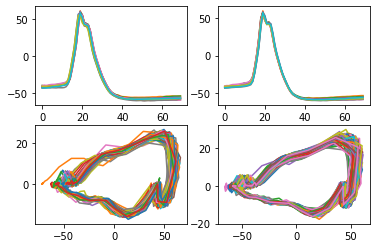

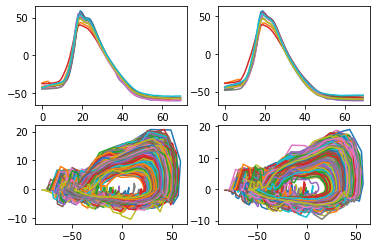

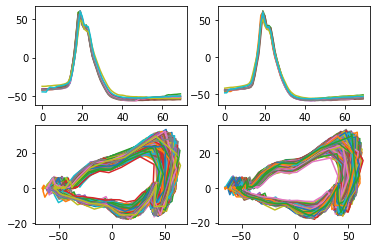

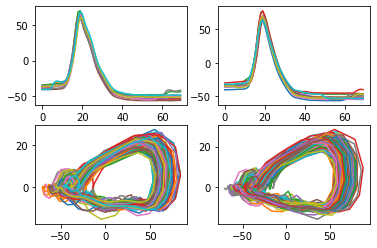

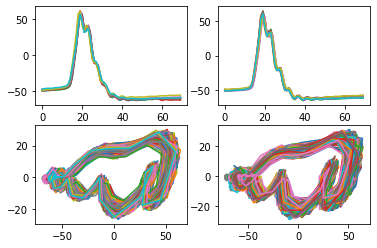

KeyboardInterrupt: ignored

In [ ]:
path = '/content/gdrive/MyDrive/lists/all_files_new.csv'
a = pd.read_csv(path)
cond= np.sort(np.unique(a['condition']))
print(cond)
path_i = '/content/gdrive/MyDrive/Analyzed/'
cond_i = 'sag'
new_a = join_cond(['D1','Dop','DOPA','DOPAMINE','sag'])
new_a = new_a.groupby('condition').get_group(cond_i)

new_a_inh = new_a.groupby('tau').get_group(50)
exp_name = np.array(new_a_inh['experimentname'])
trial = np.array(new_a_inh['trialnr'])
for i in range(len(trial)):
  exp_ = i
  try:
    data  = loadmat_(path_i+exp_name[exp_]+'_analyzed.mat')
  except:
    data  = loadmat_(path_i+'Copy of '+exp_name[exp_]+'_analyzed.mat')

  acsf = 0
  ser = 1
  spikes_acsf = data[0]['spikeindices']
  spikes_ser = data[trial[exp_]-1]['spikeindices']
  # ind = 
  fig,ax = plt.subplots(2,2)
  # plt.plot((data[1]['membrane_potential'][spikes[i]-20:spikes[i]+20]))
  for i in range(10):
    ax[0,0].plot((data[0]['membrane_potential'][spikes_acsf[i]-20:spikes_acsf[i]+50]))
  # plt.show()
  # ind = 
  # plt.plot((data[1]['membrane_potential'][spikes[i]-20:spikes[i]+20]))
  for i in range(10):
    ax[0,1].plot((data[trial[exp_]-1]['membrane_potential'][spikes_ser[i]-20:spikes_ser[i]+50]))
  # plt.show()
  # spikes = data[0]['spikeindices']

  # data[0]['input_generation_settings']
  for i in range(len(spikes_acsf)):
    ax[1,0].plot((data[0]['membrane_potential'][spikes_acsf[i]-50:spikes_acsf[i]+50])[1:],np.diff((data[0]['membrane_potential'][spikes_acsf[i]-50:spikes_acsf[i]+50])))

  for i in range(len(spikes_ser)):
    ax[1,1].plot((data[trial[exp_]-1]['membrane_potential'][spikes_ser[i]-50:spikes_ser[i]+50])[1:],np.diff((data[trial[exp_]-1]['membrane_potential'][spikes_ser[i]-50:spikes_ser[i]+50])))
  plt.show()

['ACSF' 'AgoAnta' 'Cirazoline' 'D1' 'D1ago' 'D2' 'DOPA' 'DOPAMINE' 'Dop'
 'M1-ag' 'M1-ago' 'M1-ago+ant' 'M1-ant' 'M1-ant+ago' 'aCSF' 'aCSF_BIC'
 'sag']


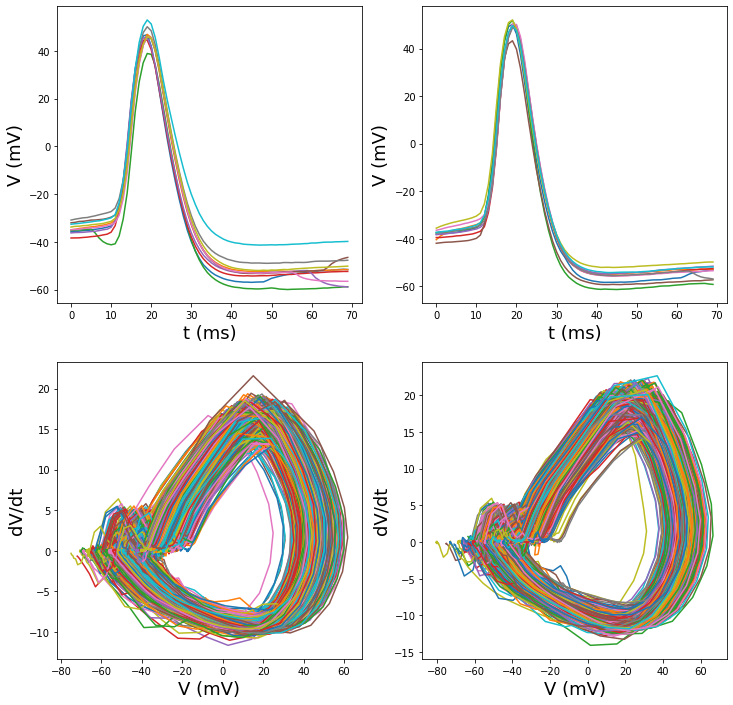

In [ ]:
path = '/content/gdrive/MyDrive/lists/all_files_new.csv'
a = pd.read_csv(path)
cond= np.sort(np.unique(a['condition']))
print(cond)
path_i = '/content/gdrive/MyDrive/Analyzed/'
cond_i = 'D1ago'
new_a = join_cond(['D1','Dop','DOPA','DOPAMINE','D1ago','sag'])
new_a = new_a.groupby('condition').get_group(cond_i)

new_a_inh = new_a.groupby('tau').get_group(50)
exp_name = np.array(new_a_inh['experimentname'])
trial = np.array(new_a_inh['trialnr'])
for i in range(len(trial)):
  if i ==4:
    exp_ = i
    try:
      data  = loadmat_(path_i+exp_name[exp_]+'_analyzed.mat')
    except:
      data  = loadmat_(path_i+'Copy of '+exp_name[exp_]+'_analyzed.mat')

    acsf = 0
    ser = 1
    spikes_acsf = data[0]['spikeindices']
    spikes_ser = data[trial[exp_]-1]['spikeindices']
    # ind = 
    fig,ax = plt.subplots(2,2,figsize=[12,12])
    # plt.plot((data[1]['membrane_potential'][spikes[i]-20:spikes[i]+20]))
    for i in range(10):
      ax[0,0].plot((data[0]['membrane_potential'][spikes_acsf[i]-20:spikes_acsf[i]+50]))
      ax[0,0].set_xlabel('t (ms)',fontsize=18)
      ax[0,0].set_ylabel('V (mV)',fontsize=18)
    # plt.show()
    # ind = 
    # plt.plot((data[1]['membrane_potential'][spikes[i]-20:spikes[i]+20]))
    for i in range(10):
      ax[0,1].plot((data[trial[exp_]-1]['membrane_potential'][spikes_ser[i]-20:spikes_ser[i]+50]))
      ax[0,1].set_xlabel('t (ms)',fontsize=18)
      ax[0,1].set_ylabel('V (mV)',fontsize=18)
    # plt.show()
    # spikes = data[0]['spikeindices']

    # data[0]['input_generation_settings']
    for i in range(len(spikes_acsf)):
      ax[1,0].plot((data[0]['membrane_potential'][spikes_acsf[i]-50:spikes_acsf[i]+50])[1:],np.diff((data[0]['membrane_potential'][spikes_acsf[i]-50:spikes_acsf[i]+50])))
      ax[1,0].set_xlabel('V (mV)',fontsize=18)
      ax[1,0].set_ylabel('dV/dt',fontsize=18)
    for i in range(len(spikes_ser)):
      ax[1,1].plot((data[trial[exp_]-1]['membrane_potential'][spikes_ser[i]-50:spikes_ser[i]+50])[1:],np.diff((data[trial[exp_]-1]['membrane_potential'][spikes_ser[i]-50:spikes_ser[i]+50])))
      ax[1,1].set_xlabel('V (mV)',fontsize=18)
      ax[1,1].set_ylabel('dV/dt',fontsize=18)
    plt.savefig(os.getcwd()+'/sag_spikeshape.png',dpi=300)
    plt.show()


In [ ]:
new_a

Unnamed: 0  ...                                        filename
141         141  ...  Copy of NC_170713_aCSF_DopD2D1_E4_analyzed.mat
147         147  ...  Copy of NC_170714_aCSF_DopD2D1_E5_analyzed.mat
148         148  ...  Copy of NC_170714_aCSF_DopD2D1_E5_analyzed.mat
154         154  ...  Copy of NC_170718_aCSF_DopD2D1_E3_analyzed.mat
165         165  ...  Copy of NC_170720_aCSF_DopD2D1_E5_analyzed.mat
170         170  ...  Copy of NC_170724_aCSF_DopD2D1_E2_analyzed.mat
174         174  ...  Copy of NC_170724_aCSF_DopD2D1_E4_analyzed.mat
186         186  ...  Copy of NC_170727_aCSF_DopD2D1_E1_analyzed.mat
190         190  ...  Copy of NC_170728_aCSF_DopD2D1_E2_analyzed.mat
656         656  ...               NC_170620_DopD2D1_E1_analyzed.mat
672         672  ...          NC_170717_aCSF_DopD2D1_E1_analyzed.mat
673         673  ...          NC_170717_aCSF_DopD2D1_E1_analyzed.mat
677         677  ...          NC_170718_aCSF_DopD2D1_E1_analyzed.mat
678         678  ...          NC_170718_aCSF_DopD2D1_E1_analyzed.mat
682         682  ...          NC_170726_aCSF_DopD2D1_E4_analyzed.mat
683         683  ...          NC_170726_aCSF_DopD2D1_E4_analyzed.mat
118         118  ...       Copy of NC_170627_DopD2D1_E1_analyzed.mat
139         139  ...  Copy of NC_170713_aCSF_DopD2D1_E4_analyzed.mat
145         145  ...  Copy of NC_170714_aCSF_DopD2D1_E5_analyzed.mat
152         152  ...  Copy of NC_170718_aCSF_DopD2D1_E3_analyzed.mat
156         156  ...  Copy of NC_170719_aCSF_DopD2D1_E2_analyzed.mat
161         161  ...  Copy of NC_170720_aCSF_DopD2D1_E4_analyzed.mat
163         163  ...  Copy of NC_170720_aCSF_DopD2D1_E5_analyzed.mat
168         168  ...  Copy of NC_170724_aCSF_DopD2D1_E2_analyzed.mat
172         172  ...  Copy of NC_170724_aCSF_DopD2D1_E4_analyzed.mat
177         177  ...  Copy of NC_170725_aCSF_DopD2D1_E3_analyzed.mat
179         179  ...  Copy of NC_170726_aCSF_DopD2D1_E1_analyzed.mat
181         181  ...  Copy of NC_170726_aCSF_DopD2D1_E5_analyzed.mat
184         184  ...  Copy of NC_170727_aCSF_DopD2D1_E1_analyzed.mat
188         188  ...  Copy of NC_170728_aCSF_DopD2D1_E2_analyzed.mat
192         192  ...  Copy of NC_170728_aCSF_DopD2D1_E3_analyzed.mat
654         654  ...               NC_170620_DopD2D1_E1_analyzed.mat
670         670  ...          NC_170717_aCSF_DopD2D1_E1_analyzed.mat
675         675  ...          NC_170718_aCSF_DopD2D1_E1_analyzed.mat
680         680  ...          NC_170726_aCSF_DopD2D1_E4_analyzed.mat
607         607  ...             Copy of xuan_7-5-19_E1_analyzed.mat
529         529  ...            Copy of xuan_10-5-19_E2_analyzed.mat
531         531  ...            Copy of xuan_10-5-19_E3_analyzed.mat
533         533  ...            Copy of xuan_10-5-19_E4_analyzed.mat
535         535  ...            Copy of xuan_10-5-19_E5_analyzed.mat
537         537  ...            Copy of xuan_10-5-19_E6_analyzed.mat
572         572  ...            Copy of xuan_14-5-19_E1_analyzed.mat
574         574  ...            Copy of xuan_14-5-19_E2_analyzed.mat
576         576  ...            Copy of xuan_14-5-19_E4_analyzed.mat
622         622  ...             Copy of xuan_8-5-19_E4_analyzed.mat
624         624  ...             Copy of xuan_8-5-19_E5_analyzed.mat
632         632  ...             Copy of xuan_9-5-19_E1_analyzed.mat
634         634  ...             Copy of xuan_9-5-19_E3_analyzed.mat
636         636  ...             Copy of xuan_9-5-19_E4_analyzed.mat
698         698  ...                    xuan_15-5-19_E1_analyzed.mat
700         700  ...                    xuan_15-5-19_E2_analyzed.mat
704         704  ...                    xuan_16-5-19_E1_analyzed.mat
706         706  ...                    xuan_16-5-19_E2_analyzed.mat
708         708  ...                    xuan_16-5-19_E3_analyzed.mat
710         710  ...                    xuan_16-5-19_E5_analyzed.mat
808         808  ...                    xuan_24-5-19_E1_analyzed.mat
810         810  ...                    xuan_24-5-19_E4_analyzed.mat

[5

In [ ]:
#@title
acsf = ['asli_28-6-19_E2_analyzed.mat',
 'Copy of NC_170630_aCSF_D1ago_E4_analyzed.mat',
 'Copy of NC_170703_aCSF_D1ago_E1_analyzed.mat',
 'Copy of NC_170711_aCSF_D1ago_E1_analyzed.mat',
 'Copy of NC_170816_aCSF_D1ago_E3_analyzed.mat',
 'Copy of NC_170821_aCSF_D1ago_E1_analyzed.mat',
 'Copy of NC_170821_aCSF_D1ago_E2_analyzed.mat',
 'Copy of NC_170821_aCSF_D1ago_E3_analyzed.mat',
 'Copy of NC_170830_aCSF_D1ago_E1_analyzed.mat',
 'Copy of NC_170830_aCSF_D1ago_E3_analyzed.mat',
 'Copy of NC_170830_aCSF_D1ago_E4_analyzed.mat',
 'Copy of NC_170913_aCSF_D1ago_E2_analyzed.mat',
 'Copy of NC_170914_aCSF_D1ago_E1_analyzed.mat',
 'Copy of NC_171006_aCSF_D1ago_E7_analyzed.mat',
 'Copy of NC_171010_aCSF_D1ago_E1_analyzed.mat',
 'Copy of NC_171010_aCSF_D1ago_E2_analyzed.mat',
 'Copy of NC_171010_aCSF_D1ago_E3_analyzed.mat',
 'Copy of NC_171010_aCSF_D1ago_E4_analyzed.mat',
 'Copy of NC_171010_aCSF_D1ago_E5_analyzed.mat',
 'Copy of NC_171010_aCSF_D1ago_E6_analyzed.mat',
 'Copy of NC_171011_aCSF_D1ago_E1_analyzed.mat',
 'Copy of NC_171011_aCSF_D1ago_E2_analyzed.mat',
 'Copy of NC_171011_aCSF_D1ago_E3_analyzed.mat',
 'Copy of NC_171011_aCSF_D1ago_E4_analyzed.mat',
 'Copy of NC_171011_aCSF_D1ago_E5_analyzed.mat',
 'Copy of NC_171012_aCSF_D1ago_E3_analyzed.mat',
 'Copy of NC_171012_aCSF_D1ago_E5_analyzed.mat',
 'Copy of NC_171012_aCSF_D1ago_E6_analyzed.mat',
 'Copy of NC_171012_aCSF_D1ago_E7_analyzed.mat',
 'Copy of NC_171012_aCSF_D1ago_E8_analyzed.mat',
 'Copy of NC_171012_aCSF_D1ago_E9_analyzed.mat',
 'Copy of NC_171017_aCSF_D1ago_E1_analyzed.mat',
 'Copy of NC_171017_aCSF_D1ago_E2_analyzed.mat',
 'Copy of NC_171017_aCSF_D1ago_E3_analyzed.mat',
 'Copy of NC_171017_aCSF_D1ago_E4_analyzed.mat',
 'Copy of NC_171017_aCSF_D1ago_E5_analyzed.mat',
 'Copy of NC_171110_aCSF_D1ago_E1_analyzed.mat',
 'Copy of NC_171110_aCSF_D1ago_E2_analyzed.mat',
 'Copy of NC_171110_aCSF_D1ago_E3_analyzed.mat',
 'Copy of NC_171207_aCSF_E1_analyzed.mat',
 'Copy of NC_171207_aCSF_E3_analyzed.mat',
 'Copy of NC_171207_aCSF_E4_analyzed.mat',
 'Copy of NC_171207_aCSF_E5_analyzed.mat',
 'Copy of NC_171207_aCSF_E6_analyzed.mat',
 'Copy of NC_171211_aCSF_E2_analyzed.mat',
 'Copy of NC_171222_aCSF_D1ago_E2_analyzed.mat',
 'Copy of NC_171222_aCSF_D1ago_E3_analyzed.mat',
 'Copy of xuan_10-10-18_E2_analyzed.mat',
 'Copy of xuan_14-1-19_E1_analyzed.mat',
 'Copy of xuan_14-1-19_E3_analyzed.mat',
 'Copy of xuan_14-3-19_E2_analyzed.mat',
 'Copy of xuan_14-3-19_E3_analyzed.mat',
 'Copy of xuan_3-4-19_E2_analyzed.mat',
 'Copy of xuan_6-3-19_E1_analyzed.mat',
 'Copy of xuan_6-3-19_E2_analyzed.mat',
 'Copy of xuan_7-3-19_E2_analyzed.mat',
 'Copy of xuan_7-3-19_E3_analyzed.mat',
 'Copy of xuan_8-1-19_E1_analyzed.mat',
 'Copy of xuan_8-1-19_E2_analyzed.mat',
 'Copy of xuan_8-1-19_E3_analyzed.mat',
 'Copy of xuan_9-1-19_E3_analyzed.mat',
 'Copy of xuan_9-1-19_E4_analyzed.mat',
 'NC_170615_aCSF_E1_analyzed.mat',
 'NC_170704_aCSF_D1ago_E2_analyzed.mat',
 'xuan_14-12-18_E1_analyzed.mat',
 'xuan_15-3-19_E1_analyzed.mat',
 'xuan_17-1-19_E2_analyzed.mat',
 'xuan_17-1-19_E3_analyzed.mat',
 'xuan_19-3-19_E1_analyzed.mat',
 'xuan_19-3-19_E4_analyzed.mat',
 'xuan_19-3-19_E5_analyzed.mat',
 'xuan_20-3-19_E3_analyzed.mat',
 'xuan_21-1-19_E1_analyzed.mat',
 'xuan_21-1-19_E2_analyzed.mat',
 'xuan_21-1-19_E5_analyzed.mat',
 'xuan_21-3-19_E1_analyzed.mat',
 'xuan_21-3-19_E3_analyzed.mat',
 'xuan_21-3-19_E4_analyzed.mat',
 'xuan_22-1-19_E1_analyzed.mat',
 'xuan_22-1-19_E2_analyzed.mat',
 'xuan_22-3-19_E1_analyzed.mat',
 'xuan_22-3-19_E2_analyzed.mat',
 'xuan_22-3-19_E3_analyzed.mat',
 'xuan_22-3-19_E4_analyzed.mat',
 'xuan_23-1-19_E1_analyzed.mat',
 'xuan_23-1-19_E2_analyzed.mat',
 'xuan_24-1-19_E2_analyzed.mat',
 'xuan_26-3-19_E2_analyzed.mat',
 'xuan_26-3-19_E4_analyzed.mat',
 'xuan_27-3-19_E2_analyzed.mat',
 'xuan_27-3-19_E4_analyzed.mat',
 'xuan_28-3-19_E2_analyzed.mat',
 'xuan_28-3-19_E3_analyzed.mat',
 'xuan_28-3-19_E4_analyzed.mat',
 'xuan_29-3-19_E1_analyzed.mat',
 'xuan_29-3-19_E2_analyzed.mat']
for i in acsf:
  data = loadmat_('/content/gdrive/MyDrive/Analyzed/'+i)
  for m in range(len(data)):
    print(data[m]['input_generation_settings']['condition'])
  print('____')  

ACSF
ACSF
____
aCSF
aCSF
D1ago
____
aCSF
aCSF
____
aCSF
aCSF
____
aCSF
aCSF
____
aCSF
aCSF
____
aCSF
aCSF
aCSF
____
aCSF
aCSF
D1ago
D1ago
____
aCSF
aCSF
D1ago
____
aCSF
aCSF
D1ago
D1ago
____
aCSF
aCSF
____
aCSF
aCSF
D1ago
D1ago
____
aCSF
aCSF
D1ago
____
aCSF
aCSF
D1ago
D1ago
____
aCSF
aCSF
____
aCSF
aCSF
____
aCSF
aCSF
aCSF
____
aCSF
aCSF
D1ago
D1ago
____
aCSF
aCSF
D1ago
____
aCSF
aCSF
____
aCSF
aCSF
aCSF
aCSF
D1ago
D1ago
D1ago
D1ago
____
aCSF
aCSF
aCSF
aCSF
____
aCSF
aCSF
aCSF
aCSF
D1ago
D1ago
____
aCSF
aCSF
aCSF
aCSF
D1ago
D1ago
D1ago
____
aCSF
aCSF
aCSF
aCSF
D1ago
D1ago
D1ago
D1ago
____
aCSF
aCSF
aCSF
aCSF
____
aCSF
aCSF
aCSF
____
aCSF
aCSF
aCSF
aCSF
D1ago
D1ago
D1ago
D1ago
D1ago
____
aCSF
aCSF
aCSF
____
aCSF
aCSF
aCSF
aCSF
D1ago
D1ago
D1ago
D1ago
____
aCSF
aCSF
____
aCSF
aCSF
aCSF
aCSF
____
aCSF
aCSF
aCSF
aCSF
D1ago
D1ago
D1ago
D1ago
D1ago
____
aCSF
aCSF
aCSF
aCSF
aCSF
aCSF
aCSF
____
aCSF
aCSF
aCSF
aCSF
D1ago
D1ago
D1ago
D1ago
____
aCSF
aCSF
aCSF
aCSF
D1ago
____
aCSF
aCSF
____
aCSF

# Fleur's code

In [ ]:
# data[1]['input_generation_settings']
# plt.plot(data[0]['membrane_potential'])


(5, 4)

In [ ]:
Settings = {}

Settings['saveindividualsettings'] = 1

# Spike Threshold 
Settings['threshold'] = {}
Settings['threshold']['thresholdmethod'] = 'fontaine'
Settings['threshold']['searchthreshold'] = 0
Settings['threshold']['thresholdwindow'] = [1, 0.25]  
Settings['threshold']['refractory_period'] = 3
Settings['threshold']['derthreshold'] = [[1, .9] ,[2, 0.35]]

# Analysis
Settings['MIanalysis'] = {}
Settings['MIanalysis']['windowtype'] = 'dependsontau'
Settings['MIanalysis']['windowsize'] = 20000 #ms, time window for analysis of tau=50 ms files, other tau scaled accordingly.    
Settings['MIanalysis']['factor_ron_roff'] = 2 #how much more often in off state than on state

# STA
Settings['staparams'] = {}
Settings['staparams']['ic'] = {}
Settings['staparams']['ic']['normalize'] = 1
Settings['staparams']['ic']['lambda_original'] = 1
Settings['staparams']['ic']['window'] = [-50, 5]
Settings['staparams']['ic']['factor_downsampling'] = 10
Settings['staparams']['ic']['lambdaI'] = 10
Settings['staparams']['ic']['projection_whichsta'] = 'stacorreg'

Settings['staparams']['x'] = {}
Settings['staparams']['x']['ic'] = {}
Settings['staparams']['x']['ic'] = Settings['staparams']['ic']
Settings['staparams']['x']['normalize'] = 0
Settings['staparams']['x']['projection_whichsta'] = 'sta'
Settings['staparams']['x']['window'] = [-25, 25]

# Classification (width and AHP amplitude)
Settings['classification'] = {}
Settings['classification']['window'] = [-5,15] 
Settings['classification']['stdwindow'] = 5
Settings['classification']['minisi'] = 2    

# import importlib.util
# import matplotlib.pyplot as plt
# from scipy.sparse import data 
# spec = importlib.util.spec_from_file_location("myfile2", "/content/utils.py")
# foo = importlib.util.module_from_spec(spec)
# spec.loader.exec_module(foo)
from utils import get_threshold_fontaine, get_spikes_width_ahpamp, findspikes

# SpikeStruct = get_spikes_width_ahpamp(np.expand_dims(data[0]['membrane_potential'][:720000],axis=1), data[1]['input_generation_settings']['sampling_rate'], Settings, 0)


WARNING    /content/utils.py:1550: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(~np.any(np.isnan(matrix[:])), 'Matrix contains NaNs!\n')
 [py.warnings]


In [ ]:
from brian2 import *
from brian2modelfitting import *
from scipy import signal
logging.console_log_level = 'debug'
## get output trace and resample
# data_temp = loadmat_('/content/Pyramidaal_5_Dop.mat')
volt =  data[0]['membrane_potential'] #
I =   data[0]['input_current'] #
# out_trace_resampled = signal.resample(np.expand_dims(data_temp['cell_response'],axis=1), 720000, axis=0)
# out_trace_resampled = np.expand_dims(volt,axis=1)[:720000,:] #signal.resample(np.expand_dims(volt,axis=1), 720000, axis=0)
out_trace_resampled = signal.resample(np.expand_dims(volt, axis=1), 720000, axis=0)
out_trace_resampled = out_trace_resampled* pow(10, 3)
out_traces = out_trace_resampled/1000
SpikeStruct = get_spikes_width_ahpamp(np.expand_dims(volt,axis=1)[:len(volt)//5,:], data[1]['input_generation_settings']['sampling_rate'], Settings, 0)
spike_times = SpikeStruct['spikeindices'] 
# get input current and resample
# in_current = np.expand_dims(data_temp['input_current'],axis=0)
in_current = np.expand_dims(I*1e-12,axis=1)
in_current_resampled = signal.resample(in_current, 720000, axis=0)
# in_current = in_current_resampled[0]
inp_traces = in_current_resampled/1000


thr  [  41600   41601   41602   41603   41604   41605   41606   41607   41608
   41609   77662   77663   77664   77665   77666   77667   77668   77669
   77670   77671   77672   89364   89365   89366   89367   89368   89369
   89370   89371   89372   89373   89374   90573   90574   90575   90576
   90577   90578   90579   90580   90581   90582  140643  140644  140645
  140646  140647  140648  140649  140650  140651  140652  140653  187382
  187383  187384  187385  187386  187387  187388  187389  187390  187391
  305183  305184  305185  305186  305187  305188  305189  305190  305191
  305192  324891  324892  324893  324894  324895  324896  324897  324898
  324899  324900  403557  403558  403559  403560  403561  403562  403563
  403564  403565  403566  429731  429732  429733  429734  429735  429736
  429737  429738  429739  429740  429741  450331  450332  450333  450334
  450335  450336  450337  450338  450339  450340  450341  451656  451657
  451658  451659  451660  451661  451662  4516

In [ ]:
# set_device('cpp_standalone')
# Model Fitting
## Parameters
area = 20000*umetre**2
El = -65*mV
EK = -90*mV
ENa = 50*mV
VT = -63*mV
dt = 0.01*ms
defaultclock.dt = dt

## Modle Definition
eqs = Equations(
'''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I)/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
g_na : siemens (constant)
g_kd : siemens (constant)
gl   : siemens (constant)
Cm   : farad (constant)
''')

## Optimization and Metric Choice
n_opt = NevergradOptimizer()
metric = MSEMetric()

## Fitting
tfitter = TraceFitter(model=eqs, input_var='I', output_var='v',
                     input=[I[:len(I)//5]*1e-12]*amp, output=[volt[:len(I)//5]]*mV, dt=dt,
                     n_samples=20,
                     param_init={'v': -65*mV},
                     method='exponential_euler')

tres, terror = tfitter.fit(n_rounds=2,
                        optimizer=n_opt, metric=metric,
                        callback='progressbar',
                        gl = [1e-09 *siemens, 1e-07 *siemens],
                        g_na = [2e-06*siemens, 2e-04*siemens],
                        g_kd = [6e-07*siemens, 6e-05*siemens],
                        Cm=[0.1*ufarad*cm**-2 * area, 2*ufarad*cm**-2 * area])

## Show results
all_output = tfitter.results(format='dataframe')
print(all_output)
traces = tfitter.generate_traces()
# # Second round
# res, error = fitter.fit(restart=True,
#                         n_rounds=20,
#                         optimizer=n_opt, metric=metric,
#                         callback='progressbar',
#                         gl = [1e-09 *siemens, 1e-07 *siemens],
#                         g_na = [2e-06*siemens, 2e-04*siemens],
#                         g_kd = [6e-07*siemens, 6e-05*siemens],
#                         Cm=[0.1*ufarad*cm**-2 * area, 2*ufarad*cm**-2 * area])

  0%|          | 0/2 [00:00<?, ?it/s]

Results in dataframes do not support units. Specify "use_units=False" to avoid this warning.


              gl            Cm      g_kd      g_na     error
0   5.642849e-08  1.005154e-10  0.000045  0.000094  0.000115
1   8.211299e-08  2.470924e-10  0.000035  0.000140  0.000126
2   2.226209e-08  9.985500e-11  0.000012  0.000090  0.000155
3   5.715781e-08  2.955466e-10  0.000014  0.000086  0.000122
4   2.429562e-08  1.141178e-10  0.000043  0.000047  0.000105
5   5.745267e-08  7.310080e-11  0.000022  0.000119  0.000130
6   4.449634e-08  3.022546e-10  0.000039  0.000058  0.000117
7   6.604145e-08  1.691523e-10  0.000019  0.000099  0.000120
8   3.839663e-08  3.285397e-10  0.000014  0.000154  0.000130
9   2.949164e-08  3.159711e-10  0.000050  0.000091  0.000115
10  7.120474e-08  2.979148e-10  0.000012  0.000173  0.000126
11  4.373896e-08  3.268398e-10  0.000027  0.000031  0.000117
12  7.181331e-08  2.467268e-10  0.000014  0.000034  0.000123
13  6.458103e-08  1.999931e-10  0.000009  0.000034  0.000120
14  7.312747e-08  1.019983e-10  0.000015  0.000167  0.000126
15  8.825361e-08  2.8464

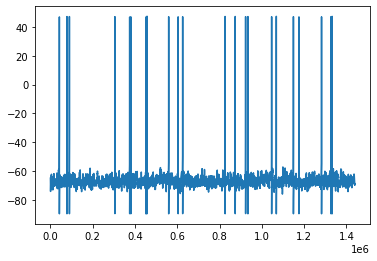

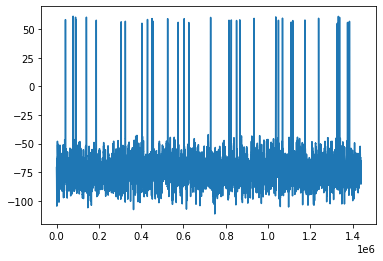

In [ ]:
plt.plot(traces[0,:]/mV)
plt.show()
plt.plot(volt[:len(I)//5])

#Spike Fitter HH model

In [ ]:
#@title
 ## Parameters volgens TraceFitter gefit op alles
gl = res['gl']#*siemens
g_na = res['g_na']#*siemens

## Modle Definition
eqs = Equations(
'''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I)/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
# g_na : siemens (constant)
g_kd : siemens (constant)
# gl   : siemens (constant)
Cm   : farad (constant)
''',)

## Set optimizer and metric
n_opt = NevergradOptimizer()
metric = GammaFactor(delta=2*ms, time=360000*ms)

## pass parameters to the NeuronGroup
fitter = SpikeFitter(model=eqs, input_var='I', dt=dt,
                      input=[I[:len(I)//5]*1e-12]*amp, output=[spike_times],
                      n_samples=20,
                      threshold='m > 0.5',
                      param_init={'v': -65*mV},
                      reset=None,
                      refractory=2*ms)

result_dict, error_spike = fitter.fit(n_rounds=20,
                                optimizer=n_opt,
                                metric=metric,
                                callback='progressbar',
                                # gNa = [2e-06*siemens, 2e-04*siemens],
                                g_kd = [6e-04*siemens, 18e-03*siemens],
                                Cm = [0.1*ufarad*cm**-2 * area, 2*ufarad*cm**-2 * area])

## Generate fitted spike times and trace
spikes = fitter.generate_spikes(params=None)
#print('spike times:', spikes)

fits_spike = fitter.generate(params=None,
                        output_var='v')
#print(fits_spike[0]/mV)

## Visualization of the results
plt.plot(out_trace.transpose())
plt.plot(fits_spike.transpose()/mV)

plt.show()

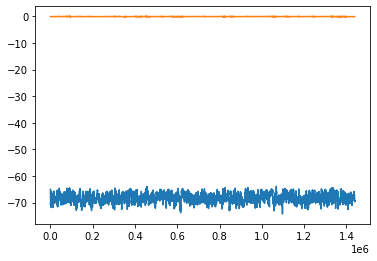

In [ ]:
plt.plot(fits_spike[0,:]/mV)

plt.plot(volt[:len(volt)//5]*mV)

Trace Fitter Wang Buszaki 

In [ ]:
## Parameters
start_scope()

area = 20000*umetre**2
# Cm = 1*uF # /cm**2
Iapp = 2*uA
# gL = 0.1*msiemens
dt = 0.01*ms
EL = -65*mV
ENa = 55*mV
EK = -90*mV
# gNa = 35*msiemens
# gK = 9*msiemens

eqs = '''
dv/dt = (-gNa*m**3*h*(v-ENa)-gK*n**4*(v-EK)-gL*(v-EL)+Iapp)/Cm : volt
m = alpha_m/(alpha_m+beta_m) : 1
alpha_m = 0.1/mV*10*mV/exprel(-(v+35*mV)/(10*mV))/ms : Hz
beta_m = 4*exp(-(v+60*mV)/(18*mV))/ms : Hz
dh/dt = 5*(alpha_h*(1-h)-beta_h*h) : 1
alpha_h = 0.07*exp(-(v+58*mV)/(20*mV))/ms : Hz
beta_h = 1./(exp(-0.1/mV*(v+28*mV))+1)/ms : Hz
dn/dt = 5*(alpha_n*(1-n)-beta_n*n) : 1
alpha_n = 0.01/mV*10*mV/exprel(-(v+34*mV)/(10*mV))/ms : Hz
beta_n = 0.125*exp(-(v+44*mV)/(80*mV))/ms : Hz
gNa : siemens (constant)
gK : siemens (constant)
gL   : siemens (constant)
Cm   : farad (constant)
'''


## Optimization and Metric Choice
n_opt = NevergradOptimizer()
metric = MSEMetric()


## pass parameters to the NeuronGroup
fitter = TraceFitter(model=eqs, input_var='Iapp', output_var='v',
                     input=[I[:len(I)//5]*1e-12]*amp, output=[volt[:len(I)//5]]*mV, dt=dt,
                     n_samples=20,
                     param_init={'v': -65*mV},
                     method='exponential_euler')

result_dict, error_spike = fitter.fit(n_rounds=20,
                                optimizer=n_opt,
                                metric=metric,
                                callback='progressbar',
                                gL = [1e-09 *siemens, 1e-07 *siemens],
                                gNa = [2e-06*siemens, 2e-04*siemens],
                                gK = [6e-04*siemens, 18e-03*siemens],
                                Cm = [0.1*ufarad*cm**-2 * area, 2*ufarad*cm**-2 * area])
## Show results
all_output = fitter.results(format='dataframe')
traces = fitter.generate_traces()
print(all_output)

  0%|          | 0/20 [00:00<?, ?it/s]

WARNING    The expression "(- 29) / 10" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]
WARNING    The expression "1 / 20" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warn

               Cm        gK            gL       gNa     error
0    2.520668e-10  0.007992  5.706503e-08  0.000051  0.000076
1    1.654306e-10  0.009810  6.477477e-08  0.000077  0.000077
2    8.178992e-11  0.005085  2.218413e-08  0.000093  0.000069
3    2.427097e-10  0.007988  3.485817e-08  0.000127  0.000076
4    1.230424e-10  0.004789  7.939670e-08  0.000128  0.000078
..            ...       ...           ...       ...       ...
395  3.164416e-11  0.001093  1.048871e-08  0.000064  0.000043
396  2.982736e-11  0.001091  1.021031e-08  0.000135  0.000076
397  2.841780e-11  0.001024  8.240276e-09  0.000053  0.000041
398  2.939338e-11  0.001119  9.298141e-09  0.000054  0.000042
399  2.682458e-11  0.001072  9.491261e-09  0.000068  0.000043

[400 rows x 5 columns]


In [ ]:
plt.plot(traces[0,:]/mV)
plt.show()
plt.plot(volt[:len(I)//5])


NameError: ignored

In [ ]:
from brian2 import *
from brian2modelfitting import *
from scipy import signal
logging.console_log_level = 'debug'
## get output trace and resample
# data_temp = loadmat_('/content/Pyramidaal_5_Dop.mat')
volt =  data[0]['membrane_potential'] #
I =   data[0]['input_current'] #
# out_trace_resampled = signal.resample(np.expand_dims(data_temp['cell_response'],axis=1), 720000, axis=0)
# out_trace_resampled = np.expand_dims(volt,axis=1)[:720000,:] #signal.resample(np.expand_dims(volt,axis=1), 720000, axis=0)
out_trace_resampled = signal.resample(np.expand_dims(volt, axis=1), 720000, axis=0)
out_trace_resampled = out_trace_resampled* pow(10, 3)
out_traces = out_trace_resampled
SpikeStruct = get_spikes_width_ahpamp(np.expand_dims(volt,axis=1)[:len(volt)//5,:], data[1]['input_generation_settings']['sampling_rate'], Settings, 0)
spike_times = SpikeStruct['spikeindices'] 
# get input current and resample
# in_current = np.expand_dims(data_temp['input_current'],axis=0)
in_current = np.expand_dims(I*1e-12,axis=1)
in_current_resampled = signal.resample(in_current, 720000, axis=0)
# in_current = in_current_resampled[0]
inp_traces = in_current_resampled

## Wang Buszaki 

In [ ]:
# set_device('cpp_standalone')
# Model Fitting
## Parameters
area = 20000*umetre**2
El = -65*mV
EK = -90*mV
ENa = 50*mV
VT = -63*mV
dt = 0.01*ms
defaultclock.dt = dt

## Modle Definition
eqs = Equations(
'''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I)/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
g_na : siemens (constant)
g_kd : siemens (constant)
gl   : siemens (constant)
Cm   : farad (constant)
''')

## Optimization and Metric Choice
n_opt = NevergradOptimizer()
metric = MSEMetric()

## Fitting
tfitter = TraceFitter(model=eqs, input_var='I', output_var='v',
                     input=inp_traces*amp, output=out_traces*mV, dt=dt,
                     n_samples=20,
                     param_init={'v': -65*mV},
                     method='exponential_euler')

tres, terror = tfitter.fit(n_rounds=20,
                        optimizer=n_opt, metric=metric,
                        callback='progressbar',
                        gl = [1e-09 *siemens, 1e-07 *siemens],
                        g_na = [2e-06*siemens, 2e-04*siemens],
                        g_kd = [6e-07*siemens, 6e-05*siemens],
                        Cm=[0.1*ufarad*cm**-2 * area, 2*ufarad*cm**-2 * area])

## Show results
all_output = tfitter.results(format='dataframe')
print(all_output)
traces = tfitter.generate_traces()
# # Second round
# res, error = fitter.fit(restart=True,
#                         n_rounds=20,
#                         optimizer=n_opt, metric=metric,
#                         callback='progressbar',
#                         gl = [1e-09 *siemens, 1e-07 *siemens],
#                         g_na = [2e-06*siemens, 2e-04*siemens],
#                         g_kd = [6e-07*siemens, 6e-05*siemens],
#                         Cm=[0.1*ufarad*cm**-2 * area, 2*ufarad*cm**-2 * area])

  0%|          | 0/20 [00:00<?, ?it/s]

Results in dataframes do not support units. Specify "use_units=False" to avoid this warning.


               gl            Cm      g_kd      g_na     error
0    2.210225e-08  2.649749e-10  0.000027  0.000045  0.000139
1    4.288939e-08  8.542190e-11  0.000050  0.000160  0.000139
2    4.572426e-08  2.558154e-10  0.000031  0.000174  0.000139
3    2.901638e-08  1.657556e-10  0.000027  0.000143  0.000139
4    6.219742e-08  2.298371e-10  0.000019  0.000097  0.000139
..            ...           ...       ...       ...       ...
395  8.253748e-08  3.626298e-10  0.000014  0.000084  0.000139
396  1.559037e-08  3.392397e-10  0.000019  0.000084  0.000139
397  9.347932e-09  3.568823e-10  0.000007  0.000055  0.000139
398  6.665207e-09  3.656603e-10  0.000004  0.000179  0.000139
399  2.818740e-08  2.378398e-10  0.000007  0.000068  0.000139

[400 rows x 5 columns]


#Ball and Stick model for Axon Initial Segment 

Starting simulation at t=51. ms for a duration of 95. ms
95. ms (100%) simulated in < 1s


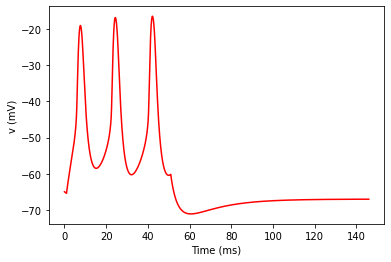

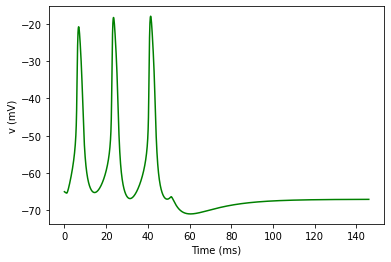

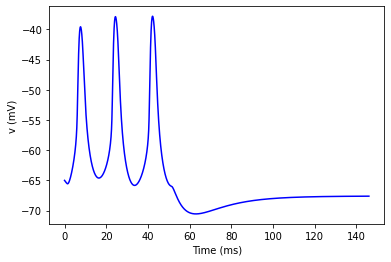

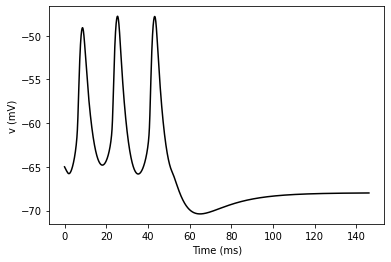

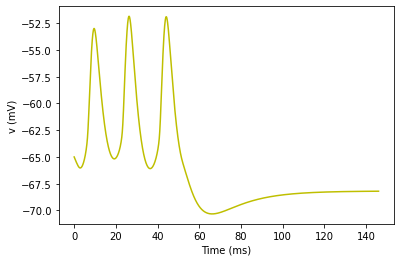

In [ ]:
from brian2 import *

defaultclock.dt = 0.025*ms

# Morphology
morpho = Soma(30*um)
morpho.axon = Cylinder(diameter=1*um, length=700*um, n=100)

# Channels
gL = 1e-4*siemens/cm**2
EL = -70*mV
ENa = 50*mV
ka = 6*mV
ki = 6*mV
va = -30*mV
vi = -50*mV
EK = -90*mV
vk = -20*mV
kk = 8*mV
eqs = '''
Im = gL*(EL-v)+gNa*m*h*(ENa-v)+gK*n*(EK-v) : amp/meter**2
dm/dt = (minf-m)/(0.3*ms) : 1 # simplified Na channel
dh/dt = (hinf-h)/(3*ms) : 1 # inactivation
dn/dt = (ninf-n)/(5*ms) : 1 # K+
minf = 1/(1+exp((va-v)/ka)) : 1
hinf = 1/(1+exp((v-vi)/ki)) : 1
ninf = 1/(1+exp((vk-v)/kk)) : 1
I : amp (point current)
gNa : siemens/meter**2
gK : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs,
                       Cm=1*uF/cm**2, Ri=100*ohm*cm, method='exponential_euler')
neuron.v = -65*mV
neuron.I = 0*amp
neuron.axon[30*um:60*um].gNa = 700*gL
neuron.axon[30*um:60*um].gK = 700*gL

# Monitors
mon=StateMonitor(neuron, 'v', record=True)

run(1*ms)
neuron.main.I = 0.15*nA
run(50*ms)
neuron.I = 0*amp
run(95*ms, report='text')

plot(mon.t/ms, mon.v[0]/mV, 'r')
xlabel('Time (ms)')
ylabel('v (mV)')

show()
plot(mon.t/ms, mon.v[20]/mV, 'g')
xlabel('Time (ms)')
ylabel('v (mV)')

show()
plot(mon.t/ms, mon.v[40]/mV, 'b')
xlabel('Time (ms)')
ylabel('v (mV)')

show()
plot(mon.t/ms, mon.v[60]/mV, 'k')
xlabel('Time (ms)')
ylabel('v (mV)')

show()
plot(mon.t/ms, mon.v[80]/mV, 'y')
xlabel('Time (ms)')
ylabel('v (mV)')
show()

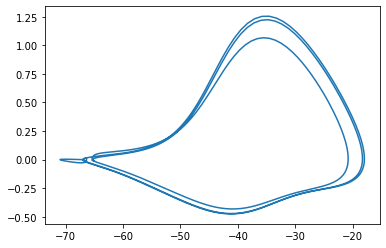

In [ ]:
plt.plot(mon.v[20][1:]/mV,np.diff(mon.v[20]/mV))

In [ ]:
!pip3 install keras
!pip3 install ann_visualizer
!pip install graphviz

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=0caca6f2118491e7187cde9bcec0e7590c4e68a46a7e7c7b7de8facbbd00785f
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [ ]:
import keras;
from keras.models import Sequential;
from keras.layers import Dense;

network = Sequential();
        #Hidden Layer#1
network.add(Dense(units=6,
                  activation='relu',
                  kernel_initializer='uniform',
                  input_dim=11));

        #Hidden Layer#2
network.add(Dense(units=6,
                  activation='relu',
                  kernel_initializer='uniform'));

        #Exit Layer
network.add(Dense(units=1,
                  activation='sigmoid',
                  kernel_initializer='uniform'));

from ann_visualizer.visualize import ann_viz;

ann_viz(network,view= title="")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np 

model = keras.Sequential()
model.add(layers.Embedding(input_dim=10, output_dim=10))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
# model.add(layers.GRU(20, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(20))

model.add(layers.Dense(10))

# model.summary()

ann_viz(model,title="sakjd")

ValueError: ignored

In [ ]:
!pip install beepy

     |████████████████████████████████| 1.3 MB 27.9 MB/s 
     |████████████████████████████████| 2.0 MB 38.0 MB/s 
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp37-cp37m-linux_x86_64.whl size=2065953 sha256=23814469b594df863fc7da5b9e2fc3412e671d7dfd3187fa1f35d53ef0a8d58d
  Stored in directory: /root/.cache/pip/wheels/9a/d6/39/e26b6f988cc5acd1fba2c1b18f0debe27bdee3e1e53f4c93f9
Successfully built simpleaudio


In [ ]:
from beepy import *  
beep(sound=4) 

SimpleaudioError: ignored